<a href="https://colab.research.google.com/github/armarmarm927/dl_lecture_competition_pub/blob/main/sparkproto9ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomAffine([-10,10],scale=(1,1.25)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)

100%|██████████| 170M/170M [00:04<00:00, 34.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [7]:
model_ft = models.resnet50(pretrained=True)
model_ft.fc = nn.Linear(model_ft.fc.in_features, 10)
net = model_ft.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 173MB/s]


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.05)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[125,175], gamma=0.2)

In [9]:
classes = train_dataset.classes

Epoch 1: Loss: 2.4106, Train Accuracy: 20.00%
Test Accuracy: 28.47%
Confusion Matrix (Epoch 1):
[[548  89 136   8   0   0   2  56 140  21]
 [ 55 661   8  68   0   0   0  32 125  51]
 [ 76  44 545  32   6   0  20 230  27  20]
 [ 15 117 203 140   5   4  43 411  22  40]
 [ 44  41 567  26  10   0  40 248  12  12]
 [  9  87 212 151   5   3  29 477  14  13]
 [  8  72 417  80   9   1  82 297  17  17]
 [ 27 108 146  63   4   0  14 564  36  38]
 [488 160  62  13   1   0   0  24 220  32]
 [ 51 609  26  37   2   0   0  52 149  74]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 2: Loss: 1.7773, Train Accuracy: 31.12%
Test Accuracy: 36.07%
Confusion Matrix (Epoch 2):
[[ 72  78  55   1   0  12  48  55 638  41]
 [  9 667   1   1   0   5  25  35 120 137]
 [ 39  23 228   6  68  83 277 162  77  37]
 [ 10  28  68  16   4 279 306 188  23  78]
 [ 29  12 183   8  84  97 316 203  38  30]
 [  3  15  86   7  10 377 222 223  15  42]
 [  4  23  50   5  22 113 670  63  11  39]
 [ 21  11  67   7   4  97  81 641  23  48]
 [ 35 184  21   3   0   1  19  22 662  53]
 [ 17 549   5   4   0   5  41  49 140 190]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 3: Loss: 1.6677, Train Accuracy: 36.39%
Test Accuracy: 39.28%
Confusion Matrix (Epoch 3):
[[412  27 184  10   0  26  16  40 257  28]
 [ 60 404  16  25   0  24  21  39  97 314]
 [ 66   4 470  12   0 207  96 121   1  23]
 [ 11   3 157  48   0 540  88 127   1  25]
 [ 27   2 450   8   0 168 127 207   4   7]
 [  4   1 130  16   0 621  36 182   0  10]
 [  4   1 158  34   0 178 566  47   2  10]
 [ 24   0 113   7   0 220   7 596   4  29]
 [278  83  78   8   0  25  16  20 445  47]
 [ 94 248  46  34   0  29  34  62  87 366]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 4: Loss: 1.6498, Train Accuracy: 37.76%
Test Accuracy: 42.17%
Confusion Matrix (Epoch 4):
[[645   3  36  12  21   6  14  14 224  25]
 [ 86 201   3  16  10   1  26  43 284 330]
 [185   2 132  42 369  65  93  62  25  25]
 [ 70   3  72 173 150 267 156  61  13  35]
 [104   2  62  25 484  45 149 110   9  10]
 [ 43   2  70 124 154 419  44 116  11  17]
 [ 23   2  19  50 178  32 644  27   7  18]
 [ 86   0  37  52 128 107  17 544   3  26]
 [314   6   9  10   6   2  13   9 598  33]
 [179  61   5  13  21   4  43  80 217 377]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 5: Loss: 1.5560, Train Accuracy: 42.16%
Test Accuracy: 43.71%
Confusion Matrix (Epoch 5):
[[637  44  42  20  11   0   1   3 221  21]
 [ 42 668   3  24   2   0   0   1 212  48]
 [172  50 214 151 270   1  41  42  34  25]
 [ 49  75 100 541  70   7  32  47  41  38]
 [108  32  82 110 488   0  57  90  20  13]
 [ 39  39 107 485 101  30   7 152  17  23]
 [ 16  97  49 225 137   0 422  13  24  17]
 [143  31  35  90 111   2   2 462  12 112]
 [155  35  14  18   1   0   1   1 772   3]
 [106 517   3  25  10   0   2   3 197 137]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 6: Loss: 1.6341, Train Accuracy: 40.99%
Test Accuracy: 38.70%
Confusion Matrix (Epoch 6):
[[727  10  88  15   0   0  15  40  49  56]
 [184 127   6   5   2   0  26  33  88 529]
 [112   7 489 121  22   2 100 102  13  32]
 [ 38  11 190 411   4   0 176 101   5  64]
 [ 78   3 441  68  46   0 172 167   5  20]
 [ 23   6 185 484   2  19  62 165  15  39]
 [ 13   9 195  75  25   0 589  54   5  35]
 [ 45   3 105 102  10   4  41 643   1  46]
 [590  34  34   6   0   0   8   8 239  81]
 [247  30  16  15   2   0  20  54  36 580]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 7: Loss: 1.5023, Train Accuracy: 45.08%
Test Accuracy: 44.80%
Confusion Matrix (Epoch 7):
[[561  23  18   7   2   0   7   5 366  11]
 [ 53 655   0   6   0   0   9   4 232  41]
 [251  18 380  74  91  12  74  28  69   3]
 [108  54 157 284  33  53 136  54 116   5]
 [144  10 227  34 304   2 141 101  33   4]
 [ 71  66 180 272  41 134  43 130  54   9]
 [ 21  29  92  58  87   2 615  12  82   2]
 [136  15  84  60  94  16  21 525  17  32]
 [ 73  57   1  10   0   0   2   2 853   2]
 [ 95 444   9   4   1   0  16   7 255 169]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 8: Loss: 1.3914, Train Accuracy: 49.43%
Test Accuracy: 50.54%
Confusion Matrix (Epoch 8):
[[752  23  35   8   1   0  14   1 147  19]
 [ 59 713   1   2   0   0   8   0 167  50]
 [182  25 440  39  52  16 107  15  92  32]
 [ 57  73 127 213  22  60 201  25 156  66]
 [134  11 203   9 306   8 167  76  49  37]
 [ 57  39 184 216  33 210  82  69  66  44]
 [ 23  18  67  22  34   1 739   2  71  23]
 [112  15  55  26  78  33  41 480  20 140]
 [155  39   4   4   1   0   3   0 783  11]
 [151 323   1   1   0   0   8   1  97 418]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 9: Loss: 1.3559, Train Accuracy: 51.32%
Test Accuracy: 52.11%
Confusion Matrix (Epoch 9):
[[733  21 115   9  11   1  17  18  47  28]
 [ 84 635  18  37   8   2  24  18  53 121]
 [104   6 474  62 173  30 119  23   5   4]
 [ 35   8 202 373  68  87 184  26  10   7]
 [ 45   4 159  50 488   7 166  76   2   3]
 [ 24   8 244 320  75 200  79  46   3   1]
 [  6   2  78  67  68   0 767   3   7   2]
 [ 52   1  67  65 150  60  27 559   1  18]
 [355  51  57  11  11   0  11   6 476  22]
 [119 190   8  26  16   2  40  66  27 506]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 10: Loss: 1.3096, Train Accuracy: 53.15%
Test Accuracy: 57.73%
Confusion Matrix (Epoch 10):
[[477  53 205  21   3  18  12  17  88 106]
 [ 12 819   6  14   1   4   4   3  17 120]
 [ 34  12 517  76  57 141  79  48   7  29]
 [  8  21 103 285  21 396  80  58   5  23]
 [ 18  11 186  50 302  94 121 177   4  37]
 [  5  14  69 116  18 669  19  79   0  11]
 [  0  10  78 133  38  28 684   9   5  15]
 [  9   7  36  28  50 119  10 700   0  41]
 [ 91 114  44  32   2   8   9   5 629  66]
 [ 15 233  10  15   0   5   1  21   9 691]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 11: Loss: 1.2450, Train Accuracy: 55.66%
Test Accuracy: 61.59%
Confusion Matrix (Epoch 11):
[[681  12  83  10  16   5  12   8 111  62]
 [ 26 585   6  27   1   2  12   4  62 275]
 [109   3 560  32  76  80  97  12  12  19]
 [ 21   2 161 258  38 293 177  17  15  18]
 [ 40   0 159  18 488  35 166  65   9  20]
 [ 12   2 125 130  42 608  35  33   3  10]
 [  3   0  78  46  28  20 808   1   9   7]
 [ 25   0  55  41 129 109  20 574   2  45]
 [ 89  15  27  16   5   2  12   1 801  32]
 [ 34  52   6  16  10   2  18  11  55 796]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 12: Loss: 1.2167, Train Accuracy: 56.85%
Test Accuracy: 57.26%
Confusion Matrix (Epoch 12):
[[613  22  86   6   4   2   6   2 228  31]
 [ 25 706   6  21   2   1   2   2 107 128]
 [ 93   1 676  32  27  54  48   6  51  12]
 [ 31   8 258 254  18 289  46   9  66  21]
 [ 55   2 362  47 301  65  79  51  26  12]
 [ 25   4 213 150  19 529   7  11  31  11]
 [  5   2 182 134  23  17 576   3  52   6]
 [ 76   2 121  34  87 120   2 483  12  63]
 [ 45  29  12   4   4   2   4   0 892   8]
 [ 55 121  10  17   0   1   5   2  93 696]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 13: Loss: 1.3445, Train Accuracy: 54.04%
Test Accuracy: 56.54%
Confusion Matrix (Epoch 13):
[[599  49  70   5   3   0   0   8 248  18]
 [  8 862   3  14   1   0   0   3  79  30]
 [116   6 621  62  77   7  37  13  52   9]
 [ 44  27 252 448  33  13  58  24  86  15]
 [ 72  10 241  60 408   1  68  87  40  13]
 [ 29  14 241 458  30 121  12  55  36   4]
 [ 16  16 121 127  40   1 600   5  61  13]
 [ 58  11  98  64  58  19   4 639  11  38]
 [ 76  46  10   5   0   0   2   1 852   8]
 [ 39 329   4  20   0   0   1   6  97 504]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 14: Loss: 1.1534, Train Accuracy: 59.07%
Test Accuracy: 59.87%
Confusion Matrix (Epoch 14):
[[789  30  28   3   3   0  16   3 104  24]
 [ 24 837   1   4   0   0  10   2  73  49]
 [163   2 509  50  45  12 150  11  49   9]
 [ 55  22 145 362  37  44 209  29  73  24]
 [ 89   4 137  47 380   1 244  59  23  16]
 [ 36  10 144 355  41 218  95  51  42   8]
 [ 12   2  49  56   9   0 826   1  40   5]
 [ 97   7  50  58  87  26  24 603  14  34]
 [111  37   6   5   1   0   7   1 822  10]
 [ 75 179   2   7   2   0  27   8  59 641]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 15: Loss: 1.1153, Train Accuracy: 60.74%
Test Accuracy: 62.15%
Confusion Matrix (Epoch 15):
[[792  16  20   2   7   0   3   7 105  48]
 [ 37 768   0   3   0   0   1   4  35 152]
 [213  11 412  43 107  42  72  51  15  34]
 [129  31  60 295  29 188  60  70  45  93]
 [105   5  72  45 424  21  96 166   9  57]
 [ 69  18  47 177  20 501  11 108  15  34]
 [ 36  21  37  85  31   8 667  13  28  74]
 [ 76   3  18  28  38  45   6 716   1  69]
 [ 97  44   3   3   0   1   0   2 823  27]
 [ 54  90   1   0   0   1   1   3  33 817]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 16: Loss: 1.0906, Train Accuracy: 61.94%
Test Accuracy: 60.08%
Confusion Matrix (Epoch 16):
[[727  35  45   2  12   1   0   2 152  24]
 [ 23 889   1   2   0   1   0   6  43  35]
 [163   7 628  28  55  65   4  24  17   9]
 [ 74  38 153 224  41 321   7  70  44  28]
 [ 94   7 188  29 461  34   4 141  17  25]
 [ 37  20 116  68  30 583   1 113  21  11]
 [ 28  48 188 199  73  40 318  19  59  28]
 [ 94  15  41  12  45  52   0 707   5  29]
 [ 65  30  12   0   0   3   0   2 879   9]
 [ 60 227   3   6   1   2   0   5 104 592]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 17: Loss: 1.0730, Train Accuracy: 62.55%
Test Accuracy: 55.92%
Confusion Matrix (Epoch 17):
[[860  49   9   0  10   7  13   5  14  33]
 [ 21 850   0   0   0   1  16   5   0 107]
 [227   8 209   0 206 102 187  20   6  35]
 [ 52  33  18   0  95 253 450  21   8  70]
 [151   2  12   0 587  13 140  69   4  22]
 [ 43  16  12   0  95 555 183  54   8  34]
 [ 23  18   6   0  35   9 874   3   3  29]
 [159   4   0   0  96  68  20 598   3  52]
 [351 238   4   0   3   3  10   0 349  42]
 [ 67 203   1   0   2   1  11   2   3 710]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 18: Loss: 1.0500, Train Accuracy: 63.54%
Test Accuracy: 66.32%
Confusion Matrix (Epoch 18):
[[861  27   8   9   2   0   8  10  49  26]
 [ 22 777   0   6  29  66   2   6  31  61]
 [192  13 457  76  75  15  98  25  35  14]
 [ 73  36  54 439  42 117 135  30  47  27]
 [ 72   2  71  44 537  15 130 109   9  11]
 [ 43  15  56 286  36 437  35  70  13   9]
 [ 19  10  22  72  22   6 803   1  33  12]
 [ 79   4  19  44  39  34  14 746   1  20]
 [116  24   1   7   1   1   7   1 823  19]
 [ 68 123   1  11   1   1   4   8  31 752]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 19: Loss: 1.0805, Train Accuracy: 62.41%
Test Accuracy: 66.37%
Confusion Matrix (Epoch 19):
[[720  29  34   7  12   0  13  15 134  36]
 [ 10 862   0   5   1   0   4   7  37  74]
 [ 95   8 488  29 112  38 119  44  53  14]
 [ 29  34  45 313  63 120 203  72  87  34]
 [ 30   4  38  21 617  17 108 136  20   9]
 [ 17  24  57 207  56 423  65 103  39   9]
 [  3  15  24  37  43   2 823   7  37   9]
 [ 32  12  14  27  53  26  20 782  15  19]
 [ 44  29   3   5   3   0   6   4 887  19]
 [ 40 156   2   4   3   1   9  17  46 722]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 20: Loss: 0.9951, Train Accuracy: 65.53%
Test Accuracy: 68.58%
Confusion Matrix (Epoch 20):
[[747  37  38  38   6   3   4  29  47  51]
 [ 11 813   1  17   1   2   3   7  11 134]
 [ 93   3 473 100 140  70  67  36   8  10]
 [ 18  16  25 602  69 153  45  44   6  22]
 [ 40   5  41  62 643  17  50 120   7  15]
 [ 12   6  30 276  49 558   6  52   6   5]
 [  6   5  20 188  63   6 688   6   9   9]
 [ 25   5  10  52  52  67   2 764   0  23]
 [ 86  62   6  28   3   0   2   3 768  42]
 [ 35 100   2  21   2   2   4  16  16 802]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 21: Loss: 1.0242, Train Accuracy: 64.67%
Test Accuracy: 30.42%
Confusion Matrix (Epoch 21):
[[ 15   8   1   7   3   2 173 786   2   3]
 [  7 310   0  15   1   3 184 477   0   3]
 [ 16   5 110  23  18  62 346 419   1   0]
 [ 18  15  45 170   6 228 353 162   1   2]
 [ 13   3  62  24  86  43 545 223   1   0]
 [  9   1  37  86   8 576 160 121   1   1]
 [  3   5  16  22   2  17 880  52   3   0]
 [ 16   6  20  34  58 116  91 657   0   2]
 [  0   5   1   1   0   1 675 128 189   0]
 [ 19 311   1  22   0   2 146 448   2  49]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 22: Loss: 1.4233, Train Accuracy: 52.03%
Test Accuracy: 61.09%
Confusion Matrix (Epoch 22):
[[745  18  69   9  10   2   6   9 121  11]
 [ 41 747   4  34   1   3   4   9 112  45]
 [107   6 569  39  67  93  79  24  14   2]
 [ 31   7 153 225  36 392  89  46  17   4]
 [ 66   2 174  47 483  57  90  72   7   2]
 [ 21   3 114 106  35 610  18  85   7   1]
 [ 13   6  63  82  68  26 725  11   6   0]
 [ 79   3  48  39  76 114   3 628   3   7]
 [130  20  27  14   9   0   6   4 782   8]
 [ 89 134   7  25  13   6  16  37  78 595]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 23: Loss: 1.0407, Train Accuracy: 63.74%
Test Accuracy: 68.30%
Confusion Matrix (Epoch 23):
[[734  26  58   9   8   0   2   2 139  22]
 [ 12 818   0  10   1   0   0  91  37  31]
 [ 73  13 644  62  86  18  45  12  35  12]
 [ 27  20 129 589  49  59  65  17  32  13]
 [ 36   4  82  70 657   7  75  36  20  13]
 [ 16   9 119 333  44 416  14  27  14   8]
 [  4  19  66 102  31   0 742   2  31   3]
 [ 52   7  45  78 122  33   4 625   9  25]
 [ 46  29   9   9   3   0   1   1 896   6]
 [ 37 173   2  12   1   0   5   1  60 709]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 24: Loss: 0.9563, Train Accuracy: 66.95%
Test Accuracy: 70.25%
Confusion Matrix (Epoch 24):
[[805  10  79   9   9   0   5   4  48  31]
 [ 34 806   0   3   1   0  31  15  20  90]
 [ 76   6 667  37  88   7  86   8  12  13]
 [ 34  12 147 459  50  72 145  34  19  28]
 [ 31   2  79  32 679   4  94  59   8  12]
 [ 18  11 154 266  55 385  46  46   8  11]
 [  9   3  39  49  26   1 848   5   8  12]
 [ 53   4  42  47  73  26   8 725   2  20]
 [ 94  21  12   3   3   0   5   1 829  32]
 [ 59  86   3   5   1   0   5   1  18 822]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 25: Loss: 0.9442, Train Accuracy: 67.49%
Test Accuracy: 70.51%
Confusion Matrix (Epoch 25):
[[866   9  23  17  10   0   3   4  62   6]
 [ 48 819   2  22   3   2  14   3  47  40]
 [109   1 697  21  41  59  53  10   7   2]
 [ 28   4 132 347  29 322  98  22  11   7]
 [ 46   2 139  36 561  51 122  34   9   0]
 [ 20   0  91  98  21 718  25  24   2   1]
 [  9   0  73  53   9  27 817   3   9   0]
 [ 68   1  39  34  73  99   8 671   2   5]
 [ 83   4  12  17   2   2   3   2 871   4]
 [102  95   6  38   1   5  17   5  47 684]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 26: Loss: 1.0688, Train Accuracy: 63.03%
Test Accuracy: 65.93%
Confusion Matrix (Epoch 26):
[[664  33  75   8   6   7   2  12 172  21]
 [ 31 795   3   7   0   1   3   5  64  91]
 [ 66  15 629  18  42 101  51  23  43  12]
 [ 11  30 100 254  32 356 107  36  49  25]
 [ 32   7 156  28 468  59  98  98  34  20]
 [ 11  10  62  90  22 694  27  55  18  11]
 [  2  10  73  36  15  35 776   6  36  11]
 [ 20  12  27  26  35 113   7 719   9  32]
 [ 35  21  11   8   0   3   1   3 911   7]
 [ 40 166   7   9   0   2   8   6  79 683]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 27: Loss: 0.9702, Train Accuracy: 66.66%
Test Accuracy: 70.19%
Confusion Matrix (Epoch 27):
[[747  22  76   5  14   0   3   6 108  19]
 [ 22 876   4   6   1   1   5   2  51  32]
 [ 52   6 758   8  62  16  40  24  31   3]
 [ 27  24 204 299  62 164 131  46  31  12]
 [ 22   1 142  15 661   9  69  49  29   3]
 [ 18   8 159  99  59 541  30  73  10   3]
 [  4   2  89  32  32   9 784   8  36   4]
 [ 47   7  47  15  83  30  10 740   8  13]
 [ 32  18  13   5   3   1   3   1 915   9]
 [ 48 176   5   4   1   1   6   1  60 698]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 28: Loss: 1.0177, Train Accuracy: 65.26%
Test Accuracy: 70.60%
Confusion Matrix (Epoch 28):
[[776  16  68  10  20   0   6   9  70  25]
 [ 23 860   2  22   1   0  11   2  29  50]
 [ 57   4 598  50 102  51  95  18  21   4]
 [ 13   8  86 411  73 231 119  25  23  11]
 [ 21   1  64  39 699  17 104  47   6   2]
 [ 10   5  50 154  69 634  17  48  10   3]
 [  2   3  30  90  29  13 817   3  13   0]
 [ 32   1  30  41  76  54   9 740   4  13]
 [ 91  24   9  12   3   0   9  15 822  15]
 [ 50 148   4  18   6   1  15   5  50 703]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 29: Loss: 0.9051, Train Accuracy: 69.11%
Test Accuracy: 71.76%
Confusion Matrix (Epoch 29):
[[704  13  96  35  12   1  10  11  63  55]
 [ 18 707   1  33   1   4   7   3  14 212]
 [ 51   1 599  54  76 130  66   7   6  10]
 [ 10   0  40 507  41 276  81  19  12  14]
 [ 11   1  52  49 706  44 102  25   5   5]
 [ 10   1  24 146  50 729  23  13   3   1]
 [  3   1  32  88  18  13 840   2   3   0]
 [ 13   0  15  44  87 125   2 696   3  15]
 [ 70  19  14  23   0   1   8  22 808  35]
 [ 25  27   3  29   2   4   7   8  15 880]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 30: Loss: 1.0077, Train Accuracy: 65.51%
Test Accuracy: 66.87%
Confusion Matrix (Epoch 30):
[[774  21  55   4   8   3   4  16 102  13]
 [ 29 832   8   9   0  10  11  11  42  48]
 [ 73   4 656   6  55  97  63  23  16   7]
 [ 21   9 125 106  28 512 124  47  21   7]
 [ 25   1 101   8 567  57 137  96   7   1]
 [ 13   8  91  24  31 712  35  71  13   2]
 [  3   2  61  23   9  42 831   4  24   1]
 [ 14   2  27  10  45  96   9 786   5   6]
 [114  30  22   4   4   5   5  14 794   8]
 [ 67 151   4  17   4  10  12  32  74 629]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 31: Loss: 0.9126, Train Accuracy: 68.70%
Test Accuracy: 73.00%
Confusion Matrix (Epoch 31):
[[833  18  27   8  12   0   3   2  81  16]
 [ 32 877   0  19   0   0   5   2  17  48]
 [101   2 610  54  89  28  79  16  16   5]
 [ 63  12  82 601  50  70  59  37  16  10]
 [ 35   1  33  48 727  11  81  52  11   1]
 [ 35   6  72 287  46 451  26  69   5   3]
 [ 11   0  38  95  21   2 815   1  17   0]
 [ 49   1  20  52  50  33   4 768   4  19]
 [ 72  35   5   8   2   0   2   2 868   6]
 [ 62  96   2  18   0   0  11   5  56 750]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 32: Loss: 0.8660, Train Accuracy: 70.59%
Test Accuracy: 74.82%
Confusion Matrix (Epoch 32):
[[821  27  28   4   7   0   1  10  53  49]
 [ 14 853   1   3   0   2   1   3   9 114]
 [ 92   6 654  20  92  31  30  43  14  18]
 [ 36  25  82 405  53 205  63  69  15  47]
 [ 32   1  44  18 747  20  27  85   7  19]
 [ 18  10  58 116  47 642   7  81   5  16]
 [  6  11  51  49  43  15 771  11  18  25]
 [ 27   3  11  14  37  35   0 843   2  28]
 [ 58  38   5   8   3   0   2   1 859  26]
 [ 22  56   2   5   1   1   0   5  21 887]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 33: Loss: 0.8937, Train Accuracy: 69.75%
Test Accuracy: 74.61%
Confusion Matrix (Epoch 33):
[[891  18  10   7   8   0   2  10  28  26]
 [ 32 880   2   3   0   0   2   2  14  65]
 [136   1 602  32 100  43  46  23   6  11]
 [ 58  10  68 418  49 253  60  42   6  36]
 [ 43   1  28  24 716  27  36 109   1  15]
 [ 29   7  41  97  38 697  12  65   5   9]
 [ 16   5  23  52  42  18 812  12   4  16]
 [ 40   3  16  18  25  43   0 841   1  13]
 [132  39   4   7   1   1   2   3 781  30]
 [ 59  76   2   9   0   1   1  15  14 823]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 34: Loss: 0.8421, Train Accuracy: 71.21%
Test Accuracy: 75.26%
Confusion Matrix (Epoch 34):
[[824   9  53  10  16   0   5  11  43  29]
 [ 27 850   6  27   0   0   4   4  17  65]
 [ 56   0 722  18  69  57  44  21   6   7]
 [ 21   3  95 446  62 193 106  48  11  15]
 [ 30   1  80  17 749  17  46  57   2   1]
 [ 17   2  63 159  65 569  45  77   2   1]
 [  1   1  40  47  26   7 868   5   3   2]
 [ 19   0  18  25  53  34   8 829   1  13]
 [ 81  20  21  12   5   0   8   2 829  22]
 [ 46  64   4  20   1   0   3   9  13 840]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 35: Loss: 0.8255, Train Accuracy: 71.85%
Test Accuracy: 75.38%
Confusion Matrix (Epoch 35):
[[857  10  19  18  11   1   2  11  48  23]
 [ 33 793   0  23   0   2   4   3  20 122]
 [ 93   1 523  69 104 110  58  23  15   4]
 [ 26   1  20 528  56 241  50  53  11  14]
 [ 23   1  15  33 775  24  53  69   6   1]
 [ 12   1  14 137  42 727  14  50   2   1]
 [  5   0  17  93  40  25 801   5   9   5]
 [ 32   0   6  28  41  47   2 839   0   5]
 [ 90  11   6  15   2   2   3   2 858  11]
 [ 68  36   2  20   0   0   5   9  23 837]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 36: Loss: 0.8224, Train Accuracy: 72.55%
Test Accuracy: 76.13%
Confusion Matrix (Epoch 36):
[[777  19  59  16  17   2   0  14  71  25]
 [ 20 908   2  17   3   1   1   5   9  34]
 [ 63   2 670  40  73  99  24  17   7   5]
 [ 17   4  66 564  60 209  26  40   5   9]
 [ 16   1  65  29 759  29  25  69   5   2]
 [ 12   1  34 152  44 713   5  36   2   1]
 [  5   1  46 103  51  28 753   7   6   0]
 [ 16   1  10  23  41  84   0 818   0   7]
 [ 54  32   7  21   3   1   3   2 867  10]
 [ 34 112   2  19   3   2   4  15  25 784]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 37: Loss: 1.7501, Train Accuracy: 44.01%
Test Accuracy: 50.55%
Confusion Matrix (Epoch 37):
[[432  40  48  37  11   7  19  17 352  37]
 [ 31 670   4  33   3   0  17  13 119 110]
 [ 99  10 290 153 116  68 150  43  61  10]
 [ 24  22  89 436  25 102 210  48  25  19]
 [ 59   9 124  79 377  14 160 123  42  13]
 [ 13   9  87 398  47 234 104  83  19   6]
 [  5  10  30  93  40   2 794   5  15   6]
 [ 52   8  19  88  76  42  38 630  12  35]
 [139  90  18  24   4   1   8   8 675  33]
 [ 26 256   4  19   2   0  23  28 125 517]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 38: Loss: 1.2735, Train Accuracy: 54.43%
Test Accuracy: 64.81%
Confusion Matrix (Epoch 38):
[[701  11  59   3  37   6   0  16 133  34]
 [ 77 706   1   8   3   3   3   3  50 146]
 [105   1 575   7 151  43  48  22  35  13]
 [ 40   3 155 182 155 258  98  53  33  23]
 [ 36   1  66   8 732  19  32  82  16   8]
 [ 32   2 142  54 100 565  17  69   9  10]
 [ 13   2  95  42  97  12 698   6  34   1]
 [ 50   2  48   8  98  45   3 731   1  14]
 [151  13  11   8   6   1   4   2 765  39]
 [ 54  38   4   6   8   0   5  15  44 826]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 39: Loss: 1.0140, Train Accuracy: 65.16%
Test Accuracy: 69.52%
Confusion Matrix (Epoch 39):
[[825  17  45   6   2   2   3   8  81  11]
 [ 38 869   9  11   0   0   3   2  42  26]
 [ 89   0 751  30  29  12  47  15  24   3]
 [ 30   5 170 519  22  84  98  33  33   6]
 [ 60   0 172  38 511   9 107  84  18   1]
 [ 22   2 182 232  23 456  31  45   6   1]
 [  9   2  72  48   7   2 828   3  28   1]
 [ 49   2  64  53  25  31   7 763   4   2]
 [197  28  10   6   1   0   6   1 745   6]
 [ 88 126   8  22   0   0  11   7  53 685]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 40: Loss: 0.9082, Train Accuracy: 69.25%
Test Accuracy: 72.19%
Confusion Matrix (Epoch 40):
[[849  14  15  10   8   0   0   9  31  64]
 [ 21 797   2   5   0   0   3   2  12 158]
 [120   2 571  49 108  42  52  34   6  16]
 [ 33   8  61 550  56 106  59  64   7  56]
 [ 39   1  33  38 730  12  34  81   8  24]
 [ 17   4  41 228  39 544  17  87   1  22]
 [ 15   6  33  79  45   3 788   8   5  18]
 [ 33   2  17  28  29  21   3 831   2  34]
 [198  28   8   9   5   0   5   2 660  85]
 [ 41  38   3   6   2   0   3   3   5 899]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 41: Loss: 0.8595, Train Accuracy: 70.88%
Test Accuracy: 73.60%
Confusion Matrix (Epoch 41):
[[768  17  30   5  16   0   5  16  93  50]
 [ 13 825   1   1   0   2   5   4  23 126]
 [ 75   3 574  22  84  78  96  26  31  11]
 [ 23   5  52 351  56 259 152  41  32  29]
 [ 23   1  32  10 695  27 115  67  21   9]
 [ 13   4  31  78  34 714  51  54  14   7]
 [  7   3  15  28  13  21 882   6  21   4]
 [ 17   3  10  10  35  58   8 826   5  28]
 [109  16   3   2   1   4   8   2 831  24]
 [ 27  37   1   4   0   1   8   6  22 894]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 42: Loss: 0.8259, Train Accuracy: 72.06%
Test Accuracy: 72.96%
Confusion Matrix (Epoch 42):
[[813   6  92   1  16   0   0   4  53  15]
 [ 53 817  18   4   1   0   2   2  52  51]
 [ 48   0 793  14  86   8  22  19   5   5]
 [ 31   5 214 462  75  71  55  51  15  21]
 [ 14   1  80  12 811   3  31  35   4   9]
 [ 11   2 187 162  74 468  14  71   4   7]
 [  7   2 129  33  45   2 765   3   5   9]
 [ 36   0  53  15  66  21   1 797   1  10]
 [177   4  33   2   5   0   2   2 764  11]
 [ 83  50   8   7   3   0   3   6  34 806]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 43: Loss: 0.8038, Train Accuracy: 72.77%
Test Accuracy: 73.03%
Confusion Matrix (Epoch 43):
[[827  20  81   3  11   0   2   4  45   7]
 [ 26 942   2   2   1   0   1   1  16   9]
 [ 54   2 796  17  52  11  43  13   9   3]
 [ 33  17 164 471  62  41 162  26  19   5]
 [ 14   1 109  17 751   5  62  35   4   2]
 [ 19   5 151 206  63 430  65  58   3   0]
 [  6   7  64  24  20   1 861   1  14   2]
 [ 30   3  50  32  71  11   5 793   2   3]
 [140  27  20   1   3   0   4   1 801   3]
 [ 73 227   3   8   3   0   7   6  42 631]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 44: Loss: 0.7913, Train Accuracy: 73.41%
Test Accuracy: 71.55%
Confusion Matrix (Epoch 44):
[[656  19  88   5  35   0   2   1 187   7]
 [ 13 914   7   5   1   1   6   1  44   8]
 [ 26   0 748  15  95  49  36   4  26   1]
 [  6  11 122 454  70 232  66  17  19   3]
 [  5   1  49  13 829  20  46  17  19   1]
 [ 10   3  90  94  75 687  15  17   9   0]
 [  1   3  63  36  34  24 820   0  19   0]
 [ 26   3  50  18 128  66   3 691   9   6]
 [197   9  10   4   5   0   4   1 768   2]
 [ 38 208  10  14   3   1   9   3 126 588]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 45: Loss: 0.7963, Train Accuracy: 73.39%
Test Accuracy: 67.24%
Confusion Matrix (Epoch 45):
[[815  12  19   7   9   0   0  54  52  32]
 [ 30 829   2   4   1   2   1  29   7  95]
 [131   2 557  18  92  73  16  98   7   6]
 [ 48  11  64 309  80 232  28 189  14  25]
 [ 39   1  73  23 672  41  24 114   8   5]
 [ 17   6  56  80  48 624   5 150   9   5]
 [ 18   8  49  77 127  25 629  35  19  13]
 [ 18   0  17  18  84 126   0 727   5   5]
 [106  55   2   2   8   0   0  12 793  22]
 [ 42  76   1   8  10   1   2  58  33 769]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 46: Loss: 0.8321, Train Accuracy: 71.94%
Test Accuracy: 77.39%
Confusion Matrix (Epoch 46):
[[849  13  39   4   7   0   0  18  51  19]
 [ 37 911   2   9   1   0   4   5   6  25]
 [ 65   1 713  35  55  43  43  31  10   4]
 [ 22  12  87 575  38 146  62  43   8   7]
 [ 28   1  67  41 710  20  65  58   7   3]
 [ 10   3  56 156  26 669  20  56   1   3]
 [  6   5  48  65  15  10 838   4   8   1]
 [ 25   5  15  31  22  52   0 845   3   2]
 [ 70  32   9  10   1   0   3   1 862  12]
 [ 51 118   5  20   0   1   5  11  22 767]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 47: Loss: 0.7619, Train Accuracy: 74.53%
Test Accuracy: 76.74%
Confusion Matrix (Epoch 47):
[[863  18  20   8   8   0   2   6  49  26]
 [ 31 898   0   1   0   0   2   0  15  53]
 [ 95   2 707  35  45  19  35  32  22   8]
 [ 27   9  74 634  24  85  55  44  22  26]
 [ 30   1  66  61 681   8  67  62  11  13]
 [ 16   5  60 236  29 552  15  69   8  10]
 [  9   4  37  71  13   1 831   2  26   6]
 [ 97   2  16  40  21  19   4 776   4  21]
 [ 63  26   3   8   1   0   1   0 881  17]
 [ 35  87   1   3   0   0   3   3  17 851]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 48: Loss: 0.7605, Train Accuracy: 74.65%
Test Accuracy: 76.40%
Confusion Matrix (Epoch 48):
[[863  18  19   5   8   2   2   5  47  31]
 [ 20 896   3   3   0   0   2   2   8  66]
 [ 97   0 666  36  68  32  66  11  17   7]
 [ 33  12  76 557  37 137  97  19  11  21]
 [ 33   2  45  41 721  19  68  55   9   7]
 [ 19   3  54 152  41 646  36  33   5  11]
 [  8   4  24  43  23   9 876   1   9   3]
 [131   4  18  33  30  69   2 699   2  12]
 [ 74  37   8   2   3   0   6   0 850  20]
 [ 39  69   1   7   1   0   4   3  10 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 49: Loss: 0.7587, Train Accuracy: 74.56%
Test Accuracy: 75.08%
Confusion Matrix (Epoch 49):
[[765  37  37   9   7   0   1   6  91  47]
 [ 11 936   4   6   0   0   1   1   6  35]
 [ 65   3 807  27  28  22  17  15  13   3]
 [ 22   6 161 563  21 135  31  30  14  17]
 [ 34   1 150  39 655  22  36  44  14   5]
 [ 13   5 129 165  32 601   8  33   7   7]
 [  6   6 109  78  16  14 753   3   8   7]
 [ 31   8  58  57  55  61   1 710   2  17]
 [ 30  39   9   7   1   0   1   0 892  21]
 [ 17 117   4  11   0   0   1   9  15 826]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 50: Loss: 0.8034, Train Accuracy: 73.16%
Test Accuracy: 74.25%
Confusion Matrix (Epoch 50):
[[847   7  51  15   9   1   1   8  39  22]
 [ 20 882   4  22   0   0   0   0  13  59]
 [ 59   0 751  47  56  23  39  20   0   5]
 [ 24   5 107 614  44  92  70  31   4   9]
 [ 26   6  79  44 701   9  77  50   2   6]
 [ 14   3  75 253  43 553  20  35   1   3]
 [  3   6  56  60  24   7 835   2   6   1]
 [ 46 168  26  62  63  35   5 579   0  16]
 [ 99  14  18  19   0   0   2   0 837  11]
 [ 49  55   4  25   1   0   5   5  30 826]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 51: Loss: 0.7862, Train Accuracy: 73.54%
Test Accuracy: 76.46%
Confusion Matrix (Epoch 51):
[[796  22  68  10   5   0   1  21  51  26]
 [ 18 919   5   9   0   1   3   6   4  35]
 [ 47   1 700  23  70  42  57  48   4   8]
 [ 11  10  74 484  36 221  51  94   4  15]
 [ 23   2  47  26 736  22  45  86   8   5]
 [ 11   3  43 101  38 694  14  91   3   2]
 [  2   5  34  63  37  28 813   8   4   6]
 [ 24   4  18  17  28  27   3 862   1  16]
 [ 40  47  21  13   1   0   1   5 852  20]
 [ 33 122   3  11   2   1   1  12  25 790]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 52: Loss: 0.7384, Train Accuracy: 75.11%
Test Accuracy: 77.66%
Confusion Matrix (Epoch 52):
[[869  13   3   5  11   0   1   4  63  31]
 [ 25 868   0   8   0   0   1   1  14  83]
 [133   1 555  77 106  23  62  18  21   4]
 [ 37   9  36 688  55  63  40  25  19  28]
 [ 32   1  16  34 806   6  56  29   8  12]
 [ 22   1  19 276  62 550  13  43   8   6]
 [ 10   5  13  81  33   6 824   5  18   5]
 [ 44   2   9  49  42  19   0 811   1  23]
 [ 47  18   2   7   1   0   2   0 902  21]
 [ 28  40   1   8   0   0   2   4  24 893]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 53: Loss: 0.8293, Train Accuracy: 72.74%
Test Accuracy: 63.25%
Confusion Matrix (Epoch 53):
[[787  22  44  18  24   5   5  49  19  27]
 [ 26 843   7  30   1   5   6  18   8  56]
 [ 97   0 492  43 131 113  34  84   3   3]
 [ 22   2  63 440  86 235  51  92   8   1]
 [ 19   1  44  71 579 125  35 125   0   1]
 [ 15   5  90 112  74 587  42  65  10   0]
 [  5   1  60 138 100  72 608  12   3   1]
 [ 30   6  30  45  76 108  13 679   3  10]
 [179  37  41  32  29   5  11   8 637  21]
 [ 50 148   4  40  18   8   7  46   6 673]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 54: Loss: 0.9300, Train Accuracy: 69.04%
Test Accuracy: 77.17%
Confusion Matrix (Epoch 54):
[[808  24  42  10  11   0   3   3  74  25]
 [ 11 924   0   7   1   0   1   2  17  37]
 [ 53   1 636  63  96  36  83   8  17   7]
 [ 22  10  39 604  58 114 104  17  16  16]
 [  9   2  28  38 791  15  77  19  15   6]
 [  8   5  23 208  56 622  39  31   4   4]
 [  2   3  14  39  23   5 897   2  11   4]
 [ 29   2  15  49  79  56  12 736   5  17]
 [ 41  30   3  10   6   0   4   0 895  11]
 [ 31 110   2   7   1   0   5   3  37 804]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 55: Loss: 0.7327, Train Accuracy: 75.34%
Test Accuracy: 64.06%
Confusion Matrix (Epoch 55):
[[676   4   0   1   0   0   0   0  11 308]
 [ 15 875   0   0   0   0   1   0  19  90]
 [569   1 255   3  23  50  13   6  14  66]
 [112  22  23 281  35 215  48  18  17 229]
 [ 93   1  29   7 553  28  32  42   3 212]
 [ 70   2  23  36  26 682  13  45   5  98]
 [ 31   2  45  18  23  17 770   0  44  50]
 [ 86   2   2   1  22  26   0 696   1 164]
 [ 25   6   1   0   1   0   1   0 710 256]
 [  3  80   0   0   0   0   1   1   7 908]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 56: Loss: 0.7217, Train Accuracy: 75.77%
Test Accuracy: 78.73%
Confusion Matrix (Epoch 56):
[[813  16  27  14  11   0   0   7  88  24]
 [ 15 928   1   4   0   0   0   0  11  41]
 [ 62   1 712  68  51  26  30  21  24   5]
 [ 18  17  58 687  40  70  44  30  14  22]
 [ 18   3  49  56 728  11  30  80  11  14]
 [ 12   8  32 255  40 578  11  54   7   3]
 [  3   6  39  96  15   3 810   6  19   3]
 [ 21   4  13  50  20  15   0 860   3  14]
 [ 30  21   3  10   2   0   1   0 926   7]
 [ 29  82   1  12   0   0   2   5  38 831]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 57: Loss: 0.6976, Train Accuracy: 76.66%
Test Accuracy: 79.18%
Confusion Matrix (Epoch 57):
[[793  19  74   8   6   0   1   6  59  34]
 [  8 916   4  10   0   2   3   2  11  44]
 [ 35   0 768  27  61  55  22  15  10   7]
 [ 12   5  91 594  39 160  51  19  14  15]
 [ 13   1  68  39 764  17  38  54   6   0]
 [ 11   2  48 158  45 675  17  36   5   3]
 [  2   0  58  48  26   8 845   3   8   2]
 [ 14   1  24  32  30  71   2 812   4  10]
 [ 41  19  14   5   0   1   4   1 899  16]
 [ 27  71   3  11   0   1   4   5  26 852]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 58: Loss: 0.6983, Train Accuracy: 76.73%
Test Accuracy: 77.66%
Confusion Matrix (Epoch 58):
[[877  10  24  12   6   0   1   1  38  31]
 [ 26 879   0   2   0   0   0   2  11  80]
 [ 76   2 651  74  80  18  62  15  11  11]
 [ 35  10  32 647  48  40  96  39  19  34]
 [ 32   1  25  38 782   3  65  44   4   6]
 [ 25   4  27 315  55 463  44  46  10  11]
 [  9   5  24  33  18   1 883   1  17   9]
 [ 36   1   9  41  30  13   1 843   2  24]
 [ 89  17   1   7   0   0   5   0 854  27]
 [ 43  45   1   3   0   0   5   3  13 887]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 59: Loss: 0.7039, Train Accuracy: 76.42%
Test Accuracy: 78.54%
Confusion Matrix (Epoch 59):
[[897   6  14   8  15   0   0   8  27  25]
 [ 36 832   0  12   0   3   1   7  11  98]
 [ 91   1 698  23  74  51  21  36   2   3]
 [ 39   1  54 516  50 197  48  68   8  19]
 [ 23   1  38  28 787  21  22  74   3   3]
 [ 18   2  34 112  42 696   9  81   2   4]
 [ 10   0  44  65  34  16 812   8   7   4]
 [ 23   0   7  15  28  34   0 883   2   8]
 [ 94  12   7  11   3   1   2   2 843  25]
 [ 46  25   3   6   2   0   3  11  14 890]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 60: Loss: 0.7375, Train Accuracy: 75.61%
Test Accuracy: 79.04%
Confusion Matrix (Epoch 60):
[[763  20  79  23  20   1   2   8  51  33]
 [ 10 892   8  17   0   0   2   5   6  60]
 [ 28   0 776  57  52  27  36  10   4  10]
 [  5   3  84 699  40  86  47  18   4  14]
 [  6   1  54  47 796   8  63  19   3   3]
 [  4   3  56 254  48 579  18  36   0   2]
 [  2   2  33  81  20   4 848   1   7   2]
 [  7   2  24  54  53  36   2 813   0   9]
 [ 52  25  17  16   1   0   4   2 862  21]
 [ 22  46   5  19   1   0   3  10  18 876]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 61: Loss: 0.9707, Train Accuracy: 67.43%
Test Accuracy: 69.49%
Confusion Matrix (Epoch 61):
[[757   9  18   1  16   1   1  13 116  68]
 [ 11 736   1   1   1   0   0   4  83 163]
 [ 83   0 542  17 133  69  39  42  57  18]
 [ 29   6  35 309  94 256  56  80  71  64]
 [ 17   1  36  13 750  19  36  92  17  19]
 [ 11   3  28  69  61 668  11 102  24  23]
 [  2   0  15  33 100  23 734   7  70  16]
 [ 21   0  11   9  56  35   4 790  25  49]
 [118   8   4   6   5   2   2   3 755  97]
 [ 17  32   1   1   3   0   1  13  24 908]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 62: Loss: 0.7844, Train Accuracy: 73.60%
Test Accuracy: 77.60%
Confusion Matrix (Epoch 62):
[[858   7  13   5   8   0   2   4  82  21]
 [ 31 868   2   8   2   0   4   1  33  51]
 [104   2 745  29  48  20  23   7  19   3]
 [ 47   8 108 556  53  89  66  32  26  15]
 [ 34   1  82  27 759  14  46  27   5   5]
 [ 29   1  86 171  61 586  22  34   7   3]
 [  6   3  51  38  18   5 837   3  34   5]
 [ 46   1  25  26  58  27   3 791   3  20]
 [ 40  10   8   5   2   0   1   0 924  10]
 [ 39  61   1  10   1   0   1   3  48 836]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 63: Loss: 0.7107, Train Accuracy: 76.34%
Test Accuracy: 78.40%
Confusion Matrix (Epoch 63):
[[838  13  23   9  16   0   2  16  40  43]
 [ 14 863   1  13   0   0   0   5  11  93]
 [ 58   0 625  49 121  54  39  35   7  12]
 [ 19   3  34 534  76 177  49  66   9  33]
 [ 15   2  20  22 791  19  39  77   7   8]
 [ 10   2  24 111  55 701   8  74   3  12]
 [  3   2  24  65  40  16 824   7   6  13]
 [  6   2   6  12  32  32   0 898   3   9]
 [ 58  19   5  10   5   0   0   1 859  43]
 [ 19  47   1   4   1   0   0  13   8 907]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 64: Loss: 0.6865, Train Accuracy: 76.96%
Test Accuracy: 78.22%
Confusion Matrix (Epoch 64):
[[886  16  19   5   7   0   1   6  36  24]
 [ 20 929   1   2   0   0   4   1   5  38]
 [ 91   2 727  29  56  20  41  17   8   9]
 [ 42  10  76 551  61 103  60  65   5  27]
 [ 46   1  49  24 746   9  47  56   8  14]
 [ 26   2  55 167  51 600  22  69   2   6]
 [ 11   3  48  40  16   5 861   3   5   8]
 [ 41   5  12  16  26  16   4 862   2  16]
 [ 73  38   9   7   0   0   2  13 834  24]
 [ 50 101   1   4   0   0   2   2  14 826]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 65: Loss: 0.6717, Train Accuracy: 77.50%
Test Accuracy: 79.43%
Confusion Matrix (Epoch 65):
[[913  16  20   5   7   0   7   2  22   8]
 [ 22 926   1   8   0   0   7   0  12  24]
 [102   1 724  30  58  21  43  11   7   3]
 [ 42   7  74 598  38 117  79  25   9  11]
 [ 30   1  53  39 768  16  42  41   8   2]
 [ 27   2  52 164  38 644  26  43   2   2]
 [  6   1  29  32  22  10 890   0   8   2]
 [ 33   2  20  26  44  28   4 839   1   3]
 [ 93  23  10   8   0   0   8   3 848   7]
 [ 68  94   1   7   1   0   7  11  18 793]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 66: Loss: 0.6820, Train Accuracy: 77.40%
Test Accuracy: 78.15%
Confusion Matrix (Epoch 66):
[[840   9  41  10   6   0   2   2  71  19]
 [ 29 897   0  12   0   0   4   1  24  33]
 [ 60   0 769  49  54  12  32   8  12   4]
 [ 31   3  67 667  45  50  91  21  12  13]
 [ 23   1  74  35 776   5  57  17   6   6]
 [ 20   2  56 287  56 510  33  25   5   6]
 [  8   2  51  50  13   4 863   0   8   1]
 [ 39   2  26  57  71  19   2 769   2  13]
 [ 45   5   5   5   0   0  19  20 889  12]
 [ 51  67   3   4   1   0   6   3  30 835]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 67: Loss: 0.6648, Train Accuracy: 77.48%
Test Accuracy: 78.99%
Confusion Matrix (Epoch 67):
[[883  12  48   8  10   1   5   7  22   4]
 [ 41 888   4  14   1   0   9   3  10  30]
 [ 39   1 758  18  61  46  58  15   2   2]
 [ 20   3  76 507  52 186 105  32  14   5]
 [ 12   1  68  15 800  17  60  22   4   1]
 [ 15   2  49 103  49 702  40  38   2   0]
 [  1   1  35  26  21  13 896   0   5   2]
 [ 20   1  24  23  50  45   6 824   3   4]
 [ 89  10  14   9   1   0   6   0 864   7]
 [ 72  81   5  19   2   1   4  11  28 777]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 68: Loss: 0.6605, Train Accuracy: 78.02%
Test Accuracy: 79.81%
Confusion Matrix (Epoch 68):
[[852  23  40  10   7   0   4   4  36  24]
 [ 15 934   0   4   0   0   1   0   8  38]
 [ 46   6 777  47  62  12  25  13   7   5]
 [ 22  13  75 688  45  46  59  21  13  18]
 [ 22   1  48  46 782   5  37  45   6   8]
 [ 15   5  52 286  52 531  19  31   5   4]
 [  3   6  40  60  13   4 859   1  13   1]
 [ 28   6  24  59  29  18   1 816   3  16]
 [ 64  21  11   3   2   0   2   0 885  12]
 [ 33  73   4   6   1   0   2   2  22 857]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 69: Loss: 0.8935, Train Accuracy: 71.44%
Test Accuracy: 72.51%
Confusion Matrix (Epoch 69):
[[891  11  17  10   4   2   2   6  48   9]
 [ 33 869   3   8   0   1   5   3  26  52]
 [125   1 705  27  46  38  29  14  12   3]
 [ 49   6  97 463  46 205  61  35  25  13]
 [ 75   2  90  27 651  22  40  78  10   5]
 [ 25   4  66 135  43 665  16  34   8   4]
 [  7   5  67  58  33  18 794   3  14   1]
 [ 49   2  27  28  27  50   2 803   3   9]
 [272  39  11  12   3   1   2  15 622  23]
 [ 63  66   2  13   3   0   7   9  49 788]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 70: Loss: 0.7474, Train Accuracy: 75.18%
Test Accuracy: 77.61%
Confusion Matrix (Epoch 70):
[[901  10  12   5   5   0   3  11  30  23]
 [ 26 878   0  11   0   1   1   2  21  60]
 [102   1 659  35  66  44  39  44   5   5]
 [ 46   7  50 584  44 113  70  58  11  17]
 [ 29   1  34  28 759   8  28 104   4   5]
 [ 15   3  25 170  42 618  21 100   4   2]
 [  9   1  26  48  26   8 857   8   9   8]
 [ 20   0   4  19  14  16   3 910   2  12]
 [131 100   5   7   2   1   4   2 717  31]
 [ 35  50   1  10   2   0   1   5  18 878]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 71: Loss: 0.6678, Train Accuracy: 77.74%
Test Accuracy: 78.88%
Confusion Matrix (Epoch 71):
[[777  16  89  18  10   0   6  13  53  18]
 [  9 927   2  16   0   0   8   2  12  24]
 [ 29   1 743  65  47  21  62  19  10   3]
 [  9   5  52 736  27  50  83  18   9  11]
 [ 10   1  39  66 715   9 114  42   3   1]
 [  7   3  37 297  30 552  34  37   2   1]
 [  3   2  20  74   6   2 886   1   3   3]
 [ 11   0   6  72  36  15   5 848   1   6]
 [ 52  21  14  17   0   0   8   1 875  12]
 [ 29  85   4  13   0   0  10   9  21 829]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 72: Loss: 0.6407, Train Accuracy: 78.80%
Test Accuracy: 79.43%
Confusion Matrix (Epoch 72):
[[833  23  22  11   8   1   4   6  75  17]
 [ 17 914   0   8   0   0   2   1  18  40]
 [ 63   4 718  58  50  25  42  25   9   6]
 [ 19  28  41 673  29  79  77  24   9  21]
 [ 25   2  40  44 762  12  59  41   5  10]
 [ 16  10  25 238  37 581  32  52   3   6]
 [  6   6  31  63  13   5 864   2   8   2]
 [ 21   7   7  45  29  18   4 854   4  11]
 [ 47  23   5   8   2   0   4   0 899  12]
 [ 31  66   3   5   1   0   2   4  43 845]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 73: Loss: 0.7776, Train Accuracy: 74.84%
Test Accuracy: 46.20%
Confusion Matrix (Epoch 73):
[[814  64   1  11   3   0  16   6  53  32]
 [ 14 928   1   4   0   0   5   2   5  41]
 [521  21  65 131  27   3 180   4  34  14]
 [ 94  45  15 521  29  57 146  30  15  48]
 [319  12   2 173 273   0 132  28  16  45]
 [195  16   8 515 106  55  69  18   5  13]
 [ 47  50   8 207  47   5 569   8  20  39]
 [250  22   1  62 547   6  11  57   6  38]
 [189 150   1   7   1   0  31   0 564  57]
 [ 35 162   0   5   1   1   5   1  16 774]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 74: Loss: 0.7890, Train Accuracy: 73.72%
Test Accuracy: 79.69%
Confusion Matrix (Epoch 74):
[[844  15  44   7   9   0   2   4  63  12]
 [ 14 927   1   7   0   0   1   1   8  41]
 [ 44   2 813  35  44  16  17  13  14   2]
 [ 24  13 107 646  37  69  50  34  10  10]
 [ 10   1  68  33 776   9  46  46   7   4]
 [ 14   5  79 223  40 573  14  45   4   3]
 [  4   3  55  74  14   4 824   3  19   0]
 [ 27   2  29  37  37  17   0 843   3   5]
 [ 55  28  11   3   0   0   4   2 888   9]
 [ 46  63   2  10   2   1   2   7  32 835]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 75: Loss: 0.7166, Train Accuracy: 76.62%
Test Accuracy: 30.80%
Confusion Matrix (Epoch 75):
[[446  58  31  37  16  15   0 186  91 120]
 [ 35 465   1  22   4  15   1 175  23 259]
 [ 97  41 146  66  99 207  36 183  42  83]
 [ 51  98  21 117  29 170  36 240  43 195]
 [ 41  46  21  66 181 225  46 261  11 102]
 [ 61  73  28 132  38 243  30 243  37 115]
 [ 33  89   6 105  40 231 150 168  17 161]
 [ 49  49   6  55  38  99  10 502  14 178]
 [151 124  11  33  20  12   2 176 254 217]
 [ 54 116   3  17   8   6   1 195  24 576]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 76: Loss: 1.1815, Train Accuracy: 59.54%
Test Accuracy: 75.13%
Confusion Matrix (Epoch 76):
[[859  19  20  10   3   1   3  18  44  23]
 [ 19 869   3   7   0   1   2   3  11  85]
 [ 97   3 637  25  56  82  52  34  11   3]
 [ 26  13  62 484  28 230  78  45  15  19]
 [ 30   2  51  33 657  29  70 114  13   1]
 [ 12   6  33 128  27 713  21  51   4   5]
 [  5   5  42  52  21  25 828   8   9   5]
 [ 24   5  18  36  37  64   7 786   5  18]
 [ 78  30   8  10   0   2   5   1 841  25]
 [ 42  60   2  14   1   0   6  14  22 839]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 77: Loss: 0.7772, Train Accuracy: 73.98%
Test Accuracy: 77.18%
Confusion Matrix (Epoch 77):
[[893  11  16  11   5   0   1   5  51   7]
 [ 26 910   0  11   0   0   1   1  21  30]
 [ 83   0 735  47  61  13  25  19  13   4]
 [ 33   6  82 696  37  48  41  30  18   9]
 [ 22   1  60  45 769   8  27  57   8   3]
 [ 15   2  98 343  48 442   7  41   2   2]
 [  8   5  57  87  39   2 781   6  13   2]
 [ 36   3  18  72  38   9   0 814   2   8]
 [ 60  16   5   7   1   0   3   1 902   5]
 [ 51  97   3  17   1   0   3   3  49 776]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 78: Loss: 0.6902, Train Accuracy: 77.00%
Test Accuracy: 78.22%
Confusion Matrix (Epoch 78):
[[802   9  88   4  17   0   3   5  55  17]
 [ 14 858  11  12   1   1   4   2  34  63]
 [ 24   0 840  13  67  11  29   5   9   2]
 [  8   1 163 555  62  81  88  22  11   9]
 [  4   1  71  16 836   7  44  15   5   1]
 [  6   2 118 173  78 565  31  26   1   0]
 [  3   2  56  31  22   3 833  45   4   1]
 [ 17   2  41  30  91  33   1 781   0   4]
 [ 37   5  30   3   3   0   5   1 907   9]
 [ 38  39   8  15   6   0  10   6  33 845]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 79: Loss: 0.6708, Train Accuracy: 77.71%
Test Accuracy: 78.64%
Confusion Matrix (Epoch 79):
[[886  18  14   5   9   0   1   9  41  17]
 [ 21 919   1   9   0   0   1   4   6  39]
 [ 88   1 787  16  57  15  14  18   3   1]
 [ 29   6 142 545  46 123  32  58   8  11]
 [ 20   2  73  19 796  11  17  55   7   0]
 [ 20   2 116 118  51 626   6  58   1   2]
 [  5   4  91  61  81   5 731  13   8   1]
 [ 29   4  18  14  39  13   0 880   1   2]
 [ 71  22  13   4   1   0   0   2 864  23]
 [ 55  73   5  11   0   0   2   9  15 830]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 80: Loss: 0.6668, Train Accuracy: 77.83%
Test Accuracy: 79.64%
Confusion Matrix (Epoch 80):
[[910  21  11   5   5   0   3   5  21  19]
 [ 16 902   0   8   0   0   1   2   7  64]
 [ 91   1 700  36  61  17  51  30   7   6]
 [ 27  15  44 618  50  74  87  55   9  21]
 [ 24   1  34  18 811   7  51  44   4   6]
 [ 16   6  35 201  56 581  29  67   2   7]
 [ 14   7  21  49  28   9 851   9   4   8]
 [ 26   2   9  26  34  13   4 870   0  16]
 [ 94  38   3   7   2   0   3   1 836  16]
 [ 44  51   1   4   1   0   2   2  10 885]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 81: Loss: 0.6371, Train Accuracy: 78.71%
Test Accuracy: 79.78%
Confusion Matrix (Epoch 81):
[[839  13  59   7  16   2   2  11  39  12]
 [ 16 925   6  14   0   0   0   6  10  23]
 [ 28   1 826  22  61  19  15  22   4   2]
 [ 14   5 111 549  53 152  29  69  11   7]
 [ 10   2  70  17 818  10  19  52   2   0]
 [  8   3  83 120  56 647   5  75   1   2]
 [  3   5  76  73  30  21 780   6   6   0]
 [ 14   2  22  11  24  15   1 908   2   1]
 [ 51  15  15  12   8   1   0   2 883  13]
 [ 41  90   5  11   6   2   2  23  17 803]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 82: Loss: 0.6180, Train Accuracy: 79.45%
Test Accuracy: 79.88%
Confusion Matrix (Epoch 82):
[[888   7  32   3  10   0   2   4  46   8]
 [ 24 897   2   6   0   0   2   3  27  39]
 [ 53   2 800  21  70  10  25   8   9   2]
 [ 26  11  99 583  60  77  71  39  19  15]
 [ 19   1  44  20 837   7  35  25   7   5]
 [ 16   5  76 173  68 564  30  54   8   6]
 [  7   2  42  39  26   4 839  23  16   2]
 [ 36   0  23  26  52  11   1 847   0   4]
 [ 61  14   9   6   1   0   1   1 901   6]
 [ 59  45   1   7   2   0   2   3  49 832]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 83: Loss: 0.6153, Train Accuracy: 79.60%
Test Accuracy: 80.40%
Confusion Matrix (Epoch 83):
[[892  13  28  11  11   0   0   6  29  10]
 [ 21 935   2  15   0   0   0   1   6  20]
 [ 62   1 787  55  34  23  19  13   4   2]
 [ 21   5  55 704  21 115  37  30   7   5]
 [ 19   1  83  59 709  19  54  47   7   2]
 [ 15   2  47 204  29 645   9  48   0   1]
 [  6   2  46  89  27   6 804  10   9   1]
 [ 22   2  18  42  14  21   1 877   2   1]
 [ 61  21  12  14   2   1   2   1 881   5]
 [ 54  82   1  23   1   2   3   6  22 806]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 84: Loss: 0.6053, Train Accuracy: 80.18%
Test Accuracy: 80.20%
Confusion Matrix (Epoch 84):
[[861  16  24   5  10   0   2   5  57  20]
 [ 19 881   0   6   0   0   6   0  21  67]
 [ 60   1 810  24  38  10  26  17  12   2]
 [ 24   7  93 635  44  61  73  30  18  15]
 [ 20   1  88  20 776   6  47  30   6   6]
 [ 17   5  78 210  50 541  26  61   6   6]
 [  3   0  60  34  18   3 869   1  11   1]
 [ 31   1  19  31  31  13   3 865   2   4]
 [ 47   8   9   7   2   0   2   1 914  10]
 [ 35  45   2   9   0   0   3   6  32 868]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 85: Loss: 0.7341, Train Accuracy: 75.77%
Test Accuracy: 78.81%
Confusion Matrix (Epoch 85):
[[789  16 104   8  14   0   2   7  45  15]
 [ 16 908   9  12   0   0   7   1  17  30]
 [ 19   0 860  20  41  10  30  17   2   1]
 [ 12   4 162 539  30 107  81  50   5  10]
 [ 12   1  91  22 755  11  69  37   1   1]
 [  9   2 111 146  43 611  20  55   1   2]
 [  4   1  80  33  11  13 851   5   2   0]
 [ 10   2  40  22  39  13   1 869   1   3]
 [ 53  16  30   4   0   0   5   1 879  12]
 [ 30  71  11  13   1   0  11  10  33 820]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 86: Loss: 0.6307, Train Accuracy: 79.08%
Test Accuracy: 80.37%
Confusion Matrix (Epoch 86):
[[909  17  13   7   4   1   1  12  26  10]
 [ 16 940   0   4   0   0   2   4   7  27]
 [ 82   3 698  18  73  68  27  20   5   6]
 [ 32  11  41 512  48 236  49  41   8  22]
 [ 23   1  25  16 809  24  29  60   4   9]
 [ 17   4  27  76  49 753  15  52   2   5]
 [  8   6  35  38  39  23 817   9  11  14]
 [ 21   1   4   8  26  45   0 887   1   7]
 [ 77  28   3   9   4   0   0   1 870   8]
 [ 45  73   1   7   1   0   2   9  20 842]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 87: Loss: 0.6228, Train Accuracy: 79.37%
Test Accuracy: 79.99%
Confusion Matrix (Epoch 87):
[[898   9  22   8   8   0   1  15  13  26]
 [ 28 864   1  12   0   1   1   4   4  85]
 [ 72   0 721  26  60  40  50  21   3   7]
 [ 29   4  56 548  48 184  57  51   9  14]
 [ 21   2  34  22 788  18  50  56   3   6]
 [ 18   3  27  99  47 736  18  47   1   4]
 [ 12   3  29  49  19  16 860   4   3   5]
 [ 25   1  10  11  27  31   2 883   1   9]
 [135  13   6   9   1   1   2   2 799  32]
 [ 41  26   1  11   1   0   1  10   7 902]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 88: Loss: 0.6015, Train Accuracy: 79.96%
Test Accuracy: 81.30%
Confusion Matrix (Epoch 88):
[[792  21  65  30   9   0   1  10  54  18]
 [  9 927   2  22   0   0   0   2   8  30]
 [ 24   0 779  74  55  28  16  18   4   2]
 [  8   5  38 768  32  88  25  24   7   5]
 [  7   2  42  62 776  24  30  54   3   0]
 [  7   2  26 220  28 680   3  32   1   1]
 [  4   5  48 104  17  18 795   3   4   2]
 [ 14   1   8  51  21  30   0 870   3   2]
 [ 30  12   9  21   3   0   1   1 916   7]
 [ 27  75   2  28   0   1   2   9  29 827]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 89: Loss: 0.6289, Train Accuracy: 79.25%
Test Accuracy: 79.71%
Confusion Matrix (Epoch 89):
[[820  28  55   9   5   0   2   2  52  27]
 [ 12 931   0   1   0   0   0   0   8  48]
 [ 45   3 783  49  34  11  50   9  12   4]
 [ 20  20  64 662  29  57  81  16  18  33]
 [ 24   2  57  41 749   7  69  29   5  17]
 [ 11  10  49 264  35 556  27  34   3  11]
 [  5   7  36  47   6   1 878   1  13   6]
 [ 33   3  22  52  39  14   4 806   3  24]
 [ 33  35   7   5   0   0   2   0 904  14]
 [ 19  73   2   4   0   0   2   1  17 882]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 90: Loss: 0.5939, Train Accuracy: 80.55%
Test Accuracy: 80.75%
Confusion Matrix (Epoch 90):
[[799  24  62  13  10   0   3   2  58  29]
 [  5 937   3   8   0   0   1   0   8  38]
 [ 26   4 786  38  46  35  41   8  11   5]
 [  9  13  63 532  37 234  69  18  10  15]
 [  7   2  45  30 786  39  59  21   4   7]
 [  7   5  36  98  27 776  22  23   2   4]
 [  1   4  40  41  11  23 870   1   5   4]
 [  8   2  17  27  47  56   2 816   3  22]
 [ 29  28   6  12   3   0   8   0 900  14]
 [ 18  77   3   8   0   0   2   3  16 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 91: Loss: 0.6006, Train Accuracy: 79.82%
Test Accuracy: 80.63%
Confusion Matrix (Epoch 91):
[[776  29  79  17  10   0   2   7  52  28]
 [  6 937   5   3   0   0   2   2  11  34]
 [ 22  14 790  47  42  10  52  12   9   2]
 [  6   7  68 710  23  64  84  19  10   9]
 [  6   4  48  69 726  11  85  46   4   1]
 [  3   5  54 245  24 603  40  22   3   1]
 [  1   4  26  44   8   4 906   1   5   1]
 [  7   3  27  46  23  30   2 851   5   6]
 [ 33  31   8   5   3   0   4   0 903  13]
 [ 15  82   2  11   1   0   2   5  21 861]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 92: Loss: 0.8157, Train Accuracy: 74.66%
Test Accuracy: 67.01%
Confusion Matrix (Epoch 92):
[[865  12  30   6   3   0   2   2  67  13]
 [ 89 807   6   2   0   0   2   0  35  59]
 [ 94   2 812  12  26   8  17   4  24   1]
 [ 88  18 229 353  25  77 123  13  57  17]
 [ 55   2 255  21 543   9  56  37  12  10]
 [ 45  13 253 147  26 398  51  32  28   7]
 [ 12   6 155  23   7   7 742   1  45   2]
 [115   1  62  25  52  27   4 697   9   8]
 [ 87  41   5   5   2   0   1   0 849  10]
 [103 158   8   5   0   0   4   2  85 635]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 93: Loss: 0.7426, Train Accuracy: 75.88%
Test Accuracy: 81.30%
Confusion Matrix (Epoch 93):
[[844   9  31  20   8   0   1  13  36  38]
 [ 17 889   1  21   0   1   0   1  11  59]
 [ 49   0 774  54  48  21  27  20   4   3]
 [ 10   5  54 679  39 109  47  42   5  10]
 [ 10   1  42  44 790  20  43  46   2   2]
 [  7   0  33 184  30 679  12  52   2   1]
 [  4   3  40  68  11  14 852   4   3   1]
 [  7   1  10  41  25  22   1 881   2  10]
 [ 57  12   9  20   3   0   3   1 873  22]
 [ 24  58   1  14   1   0   5  12  16 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 94: Loss: 0.6102, Train Accuracy: 79.53%
Test Accuracy: 80.31%
Confusion Matrix (Epoch 94):
[[848  26  19  19  14   0   1  11  30  32]
 [ 14 937   0   9   0   2   1   1   3  33]
 [ 55   1 684  50  80  86  18  18   4   4]
 [ 10   9  18 606  63 229  29  21   4  11]
 [  6   2  23  32 848  34  22  31   2   0]
 [  7   4  11 108  47 781   4  32   1   5]
 [  3   5  23  73  45  22 823   1   4   1]
 [ 13   2   3  32  49  62   1 827   1  10]
 [ 60  49   6  19   5   1   2   1 823  34]
 [ 27  78   2  17   3   1   3   9   6 854]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 95: Loss: 0.5834, Train Accuracy: 80.37%
Test Accuracy: 81.20%
Confusion Matrix (Epoch 95):
[[903   4  37  10   1   0   1   6  20  18]
 [ 26 876   2  11   0   1   1   0   9  74]
 [ 69   1 789  39  33  30  19  12   4   4]
 [ 23   5  63 670  25 148  26  16   8  16]
 [ 29   1  64  44 731  18  35  63   6   9]
 [ 16   1  45 146  19 733   8  25   3   4]
 [  6   2  49  91  15  18 810   1   6   2]
 [ 28   1  16  26  11  36   1 873   1   7]
 [ 91  13   8  11   0   0   1   1 857  18]
 [ 45  36   2  19   1   0   1   5  13 878]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 96: Loss: 0.7102, Train Accuracy: 76.69%
Test Accuracy: 77.80%
Confusion Matrix (Epoch 96):
[[845  14  24   7   4   1   4   4  73  24]
 [ 17 895   3  16   0   0   1   1  17  50]
 [ 76   2 768  38  41  17  37   8  11   2]
 [ 31   3  90 617  33 118  60  24  10  14]
 [ 27   1  96  41 717  18  54  38   6   2]
 [ 22   5  80 169  33 628  26  27   5   5]
 [  5   1  73 106  24  10 764   1  14   2]
 [ 31   1  29  34  26  54   3 810   4   8]
 [ 37  15   8   5   2   0   9   0 899  25]
 [ 29  76   2  15   2   0   6   6  27 837]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 97: Loss: 0.6259, Train Accuracy: 78.97%
Test Accuracy: 81.62%
Confusion Matrix (Epoch 97):
[[899  11  13   9  10   0   1   7  34  16]
 [ 17 888   1  14   0   0   1   1  12  66]
 [ 67   2 771  30  48  17  49   7   5   4]
 [ 25   6  71 631  38 110  77  25   8   9]
 [ 14   1  50  30 779  15  69  34   2   6]
 [ 13   1  50 154  34 680  30  31   2   5]
 [  8   4  25  38  11   7 899   2   4   2]
 [ 21   1  24  35  32  29   2 846   2   8]
 [ 53  13   9  11   1   0  10   1 893   9]
 [ 28  45   1  14   2   0   3   8  23 876]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 98: Loss: 0.5817, Train Accuracy: 80.56%
Test Accuracy: 81.77%
Confusion Matrix (Epoch 98):
[[814  20  43  12  16   0   2   7  63  23]
 [  7 939   0  11   1   0   1   1   6  34]
 [ 24   5 721  59  71  24  63  16  12   5]
 [ 11   8  26 727  42  75  61  23  12  15]
 [  7   1  17  32 843  10  49  28   4   9]
 [  8   6  15 237  46 633  20  26   3   6]
 [  2   2  11  65  15   1 888   1   9   6]
 [ 13   1   9  53  41  31   3 840   2   7]
 [ 32  22   2  12   5   0   7   1 894  25]
 [ 17  68   2   8   3   0   3   7  14 878]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 99: Loss: 0.5716, Train Accuracy: 81.03%
Test Accuracy: 82.14%
Confusion Matrix (Epoch 99):
[[910  17   9   7   3   0   1  10  30  13]
 [ 13 942   0   3   0   0   0   0  11  31]
 [ 68   1 756  32  46  31  34  24   5   3]
 [ 32  15  44 619  36 103  71  47  16  17]
 [ 23   3  46  24 810  15  39  34   2   4]
 [ 21   8  27 141  43 679  29  46   2   4]
 [  9   2  24  32  19   4 898   3   5   4]
 [ 20   1  11  20  39  29   2 869   2   7]
 [ 71  17   6   8   1   0   4   3 883   7]
 [ 40  73   2   5   2   1   2   9  18 848]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 100: Loss: 0.5638, Train Accuracy: 81.28%
Test Accuracy: 81.81%
Confusion Matrix (Epoch 100):
[[872  14  45  10  13   0   1   5  27  13]
 [ 13 937   0   9   0   1   1   3   6  30]
 [ 39   2 802  17  81  15  27  12   4   1]
 [ 16  10  79 552  69 156  66  35  10   7]
 [ 14   1  35  15 859  11  38  23   2   2]
 [ 11   4  54  97  71 703  21  37   2   0]
 [  4   2  33  31  15   7 897   2   6   3]
 [ 15   0  20  14  62  31   1 846   2   9]
 [ 68  19  10   7   3   0   2   1 878  12]
 [ 43  73   4   9   2   1   3   8  22 835]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 101: Loss: 0.5525, Train Accuracy: 81.47%
Test Accuracy: 80.12%
Confusion Matrix (Epoch 101):
[[887  11  53   2   5   1   2   8  25   6]
 [ 17 931   5   1   0   0   1   3   9  33]
 [ 31   5 849   3  36  42  20  12   1   1]
 [ 12  16 102 315  28 415  43  47  10  12]
 [ 11   2  93   6 750  43  38  49   3   5]
 [ 14   6  57  22  30 800  13  52   2   4]
 [  8   3  58  29   9  29 854   4   4   2]
 [ 18   0  17   3  19  34   1 901   2   5]
 [ 54  27  19   1   0   3   3   1 884   8]
 [ 39  78   3   3   1   1   6  11  17 841]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 102: Loss: 0.6038, Train Accuracy: 80.01%
Test Accuracy: 77.59%
Confusion Matrix (Epoch 102):
[[890   5  36   6   8   0   0   9  15  31]
 [ 31 647   4   4   0   0  22   1  36 255]
 [ 47   2 815  15  66   9  26  13   1   6]
 [ 26  22 113 568  69  66  73  27   7  29]
 [ 13   0  62  16 825   5  42  25   1  11]
 [ 16   4  89 167  71 578  18  45   2  10]
 [ 10   3  58  18  20   2 871   2   4  12]
 [ 14   1  24  17  49  21   1 859   1  13]
 [106  25  10   1   4   0   4   0 815  35]
 [ 35  52   4   2   1   0   1   4  10 891]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 103: Loss: 0.5769, Train Accuracy: 80.84%
Test Accuracy: 81.11%
Confusion Matrix (Epoch 103):
[[901  17  26   5   6   0   1   8  22  14]
 [ 19 887   1   6   0   0  36   9   9  33]
 [ 50   2 773  40  53  20  37  21   3   1]
 [ 27  10  61 621  41 140  27  47  16  10]
 [ 27   1  25  23 811  14  32  60   4   3]
 [ 16   4  42 133  51 699  10  43   1   1]
 [  4   3  28  86  33  15 816   6   8   1]
 [ 24   1   9  20  19  26   0 896   2   3]
 [ 71  20   8   9   1   0   0   1 881   9]
 [ 39  90   2   8   2   2   3   9  19 826]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 104: Loss: 0.5532, Train Accuracy: 81.45%
Test Accuracy: 81.40%
Confusion Matrix (Epoch 104):
[[898   7  18   5   4   0   1   7  44  16]
 [ 26 833   2   3   0   0  57  14   9  56]
 [ 61   1 799  29  44  20  19  17   8   2]
 [ 30   9  64 598  35 138  60  33  16  17]
 [ 24   1  56  30 768  14  42  57   2   6]
 [ 20   5  33 132  37 710  18  38   4   3]
 [  9   4  48  33  17   8 862   5  13   1]
 [ 23   0  11  13  20  32   1 887   3  10]
 [ 46  12   7   4   0   0   0   1 915  15]
 [ 39  56   1   3   1   0   3   6  21 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 105: Loss: 0.5477, Train Accuracy: 81.89%
Test Accuracy: 80.38%
Confusion Matrix (Epoch 105):
[[872   8  52   9   8   0   5   6  19  21]
 [ 22 823   0  10   1   0  66  25   7  46]
 [ 30   1 772  23  62  35  47  20   4   6]
 [ 19   4  53 571  61 149  86  37   9  11]
 [ 24   1  32  19 812  13  48  42   3   6]
 [ 12   3  23 129  62 700  27  38   0   6]
 [  7   4  19  27  21   6 910   4   1   1]
 [ 16   1  11  20  34  34   3 874   2   5]
 [104  19   9   8   1   0   6   4 832  17]
 [ 40  60   1   5   4   0   5   6   7 872]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 106: Loss: 0.5479, Train Accuracy: 81.68%
Test Accuracy: 80.93%
Confusion Matrix (Epoch 106):
[[858  16  35   9   5   0   5   4  54  14]
 [ 10 882   1   8   0   0   6  65   8  20]
 [ 31   1 833  25  38  20  28  13   8   3]
 [ 13   8  90 593  35 111  95  31  18   6]
 [ 13   1  81  23 787   7  61  18   5   4]
 [  8   1  48 131  48 671  38  49   4   2]
 [  3   1  38  27   8   2 909   1   8   3]
 [ 15   0  26  26  46  27   4 852   0   4]
 [ 30  27  10   8   3   0   5   0 908   9]
 [ 21 126   3  10   0   1   6   6  27 800]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 107: Loss: 0.5459, Train Accuracy: 81.98%
Test Accuracy: 80.83%
Confusion Matrix (Epoch 107):
[[848   5  53   6  13   1   0  14  45  15]
 [ 25 845   5   4   0   0   1  71  19  30]
 [ 42   1 823  21  48  24  11  29   1   0]
 [ 17   4  83 575  37 173  29  64  10   8]
 [ 19   1  50  29 798  15  18  63   4   3]
 [ 11   2  45  97  35 738   7  63   2   0]
 [  7   3  89  54  26  22 785   8   4   2]
 [ 12   3  13   6  24  26   0 910   1   5]
 [ 46   8  10   4   4   1   0   2 918   7]
 [ 34  67   3   5   4   3   3  11  27 843]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 108: Loss: 0.5431, Train Accuracy: 82.09%
Test Accuracy: 80.43%
Confusion Matrix (Epoch 108):
[[869  11  40   8   8   0   3   8  29  24]
 [ 13 769   5   5   1   0   4 158  10  35]
 [ 41   3 796  25  61  25  33  12   1   3]
 [ 17   4  61 606  43 160  62  28   7  12]
 [  6   1  37  29 826  15  60  22   3   1]
 [  8   3  53 112  52 717  18  33   1   3]
 [  4   0  35  33  11   7 901   1   7   1]
 [ 13   0  26  26  49  29   1 850   2   4]
 [ 67  19  14   6   2   0   5   0 865  22]
 [ 35  76   1  16   4   0   5   6  13 844]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 109: Loss: 0.5444, Train Accuracy: 81.82%
Test Accuracy: 80.24%
Confusion Matrix (Epoch 109):
[[848  23  50   2   3   0   1   7  42  24]
 [ 12 889   3   3   0   0   0  60   9  24]
 [ 43   6 839  19  24  12  24  23   6   4]
 [ 13  17  97 540  26 138  64  65  13  27]
 [ 17   2  85  23 666  18  47 125   7  10]
 [ 12   7  76  98  26 674  18  77   2  10]
 [  5   2  52  24   9   7 880   5  13   3]
 [ 19   7  13   5   2  13   1 930   2   8]
 [ 38  27   8   6   1   0   1   0 905  14]
 [ 18  97   2   3   0   0   2   4  21 853]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 110: Loss: 0.5363, Train Accuracy: 82.20%
Test Accuracy: 80.06%
Confusion Matrix (Epoch 110):
[[845   7  64  14   9   3   3   5  41   9]
 [ 26 783   1  24   0   0   5 127  11  23]
 [ 27   0 841  28  32  26  36   6   4   0]
 [ 13   2  78 672  27 125  51  19   9   4]
 [ 15   1  78  45 755  12  69  23   2   0]
 [ 15   1  56 164  38 686  21  18   1   0]
 [  4   1  39  36   7   7 899   3   3   1]
 [ 21   3  32  25  46  35   2 833   1   2]
 [ 50  12  16  11   0   1   3   1 901   5]
 [ 48  85   3  23   1   0   8   5  36 791]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 111: Loss: 1.1980, Train Accuracy: 67.80%
Test Accuracy: 53.05%
Confusion Matrix (Epoch 111):
[[662  54  77   4   9   6   2  23 149  14]
 [ 84 454  19  10  47  17   6  25 185 153]
 [ 72  21 628   8  49 114  59  28  15   6]
 [ 22  51 154  43  26 500 119  58  13  14]
 [ 41  23 192  18 362  90 131 112  27   4]
 [  9  24 151   8  29 660  27  75   8   9]
 [  7  16 153  27  33 149 587  14  10   4]
 [ 35  29  46  12  40 121  10 669  10  28]
 [ 99  88  37   3   5   5   7   7 736  13]
 [ 50 241  13  10  14  12   6  35 115 504]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 112: Loss: 0.9399, Train Accuracy: 67.52%
Test Accuracy: 77.02%
Confusion Matrix (Epoch 112):
[[865  23  30   5   7   0   1  10  36  23]
 [ 25 806   1  16  82   9   0   3  10  48]
 [ 71   1 728  56  62  21  35  15   7   4]
 [ 23   9  56 685  44  71  42  47   9  14]
 [ 19   2  43  46 795   5  43  37   7   3]
 [ 12   3  43 265  53 557  10  50   2   5]
 [  4   3  46 138  26   4 761   1  12   5]
 [ 22   3  15  34  33  17   1 864   2   9]
 [ 83  41   9   9   1   0   2   0 840  15]
 [ 48 106   3  16   2   0   0   6  18 801]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 113: Loss: 0.6771, Train Accuracy: 77.18%
Test Accuracy: 79.32%
Confusion Matrix (Epoch 113):
[[807  25  51   5   8   0   5   5  52  42]
 [ 10 814   3   9  78  24   7   2   8  45]
 [ 36   1 785  29  46  20  52  14  11   6]
 [ 11  13  65 585  25 118 123  33  12  15]
 [  8   1  48  44 760  12  68  47   8   4]
 [ 10   6  62 156  42 656  29  32   2   5]
 [  1   3  43  34  11   4 897   4   3   0]
 [ 17   2  20  22  26  27   1 870   2  13]
 [ 43  21   9   2   3   0  12   0 889  21]
 [ 17  75   1  16   1   0   4   4  13 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 114: Loss: 0.5906, Train Accuracy: 80.38%
Test Accuracy: 80.40%
Confusion Matrix (Epoch 114):
[[889   6  14   3   5   0   1   4  55  23]
 [ 20 792   1   3  56   7  16   3  19  83]
 [ 75   0 743  12  64  21  54  13  15   3]
 [ 34   9  52 505  48 148 117  42  22  23]
 [ 33   1  24  16 839  11  47  21   3   5]
 [ 23   3  41  96  57 703  33  33   3   8]
 [  6   1  30  22  23   7 890   2  15   4]
 [ 36   0  12   8  42  26   2 859   1  14]
 [ 51   5   5   4   3   0   1   2 916  13]
 [ 34  30   2   4   1   1   2   4  18 904]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 115: Loss: 0.5588, Train Accuracy: 81.12%
Test Accuracy: 80.95%
Confusion Matrix (Epoch 115):
[[849   8  57  14   3   0   2   6  50  11]
 [ 16 812   0  20  45   0  41   1  29  36]
 [ 32   0 832  47  39  18  20   5   6   1]
 [ 12   3  58 739  32  88  40  15  10   3]
 [ 13   1  67  44 803  14  25  27   4   2]
 [  7   0  43 230  45 646   9  18   2   0]
 [  4   1  49  80  16   5 832   3  10   0]
 [ 21   0  25  44  34  35   0 836   1   4]
 [ 35   6  13  11   1   0   1   1 925   7]
 [ 46  51   2  23   2   0   5   8  42 821]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 116: Loss: 0.5403, Train Accuracy: 81.93%
Test Accuracy: 80.62%
Confusion Matrix (Epoch 116):
[[879   9  34   5   5   0   2  10  38  18]
 [ 17 842   1   4  56   0  15   3  19  43]
 [ 37   0 808  18  48  18  26  30   9   6]
 [ 18  12  79 510  64 168  40  68  22  19]
 [ 16   1  62  13 802   8  32  57   4   5]
 [ 10   4  63  76  50 679  12  98   4   4]
 [  4   1  70  40  17   8 841   2  11   6]
 [ 15   1  13   5  21  15   2 920   3   5]
 [ 45   9   9   3   2   0   0   3 917  12]
 [ 41  52   5   4   5   0   2   6  21 864]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 117: Loss: 0.5276, Train Accuracy: 82.26%
Test Accuracy: 80.75%
Confusion Matrix (Epoch 117):
[[869   5  39   7   3   0   3   7  52  15]
 [ 19 837   2   5  60   0  30   2  13  32]
 [ 39   1 826  25  37  29  16  16   8   3]
 [ 23   9  80 618  41 136  37  39  12   5]
 [ 15   1  73  30 759  21  31  58   7   5]
 [ 10   1  62 134  36 694   7  54   0   2]
 [  4   1  77  57  25  10 811   3  11   1]
 [ 16   1  17  14  15  26   1 905   2   3]
 [ 42   9  17   5   3   0   0   1 914   9]
 [ 40  69   3  10   1   0   2  10  23 842]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 118: Loss: 0.5153, Train Accuracy: 82.91%
Test Accuracy: 80.86%
Confusion Matrix (Epoch 118):
[[873  11  47   6   5   0   3   6  38  11]
 [ 18 838   1   5  68   0  35   1  11  23]
 [ 38   2 799  38  48  21  21  21   8   4]
 [ 27  14  48 666  51  89  44  40  10  11]
 [ 28   2  35  34 815   7  42  30   2   5]
 [ 19   2  41 172  55 652  15  38   3   3]
 [  8   1  52  59  17   5 846   3   6   3]
 [ 27   2   9  28  38  18   2 870   2   4]
 [ 55  17   7   4   2   0   3   0 907   5]
 [ 50  85   4   6   1   0   1   6  27 820]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 119: Loss: 0.5308, Train Accuracy: 82.31%
Test Accuracy: 81.21%
Confusion Matrix (Epoch 119):
[[866  10  43   2  17   0   2   6  36  18]
 [ 10 935   3   1   0   0  10   2  10  29]
 [ 31   1 829   5  77  23  16  10   6   2]
 [ 18   6 130 390 108 214  73  25  14  22]
 [ 10   2  28   5 888  11  21  26   2   7]
 [  6   5  74  40  92 716  16  43   5   3]
 [  7   3  54   7  49   8 856   4   8   4]
 [ 19   4  19   5  52  32   0 863   1   5]
 [ 45  10  12   0   4   0   1   0 919   9]
 [ 34  66   5   2   8   1   1   4  20 859]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 120: Loss: 0.5215, Train Accuracy: 82.62%
Test Accuracy: 80.72%
Confusion Matrix (Epoch 120):
[[835  19  40  21  17   0   2  12  32  22]
 [ 13 801   1  11  76   0  57   1   3  37]
 [ 28   1 773  70  54  34  10  20   5   5]
 [ 10   6  34 716  30 149  15  26   6   8]
 [ 10   1  29  53 817  28  17  38   3   4]
 [  3   3  24 152  26 763   2  22   1   4]
 [  5   1  33 134  26  28 767   2   1   3]
 [ 12   2   8  44  20  47   0 862   1   4]
 [ 59  25   5  16   4   0   1   0 876  14]
 [ 26  66   2  15   2   1   1  15  10 862]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 121: Loss: 0.5260, Train Accuracy: 82.50%
Test Accuracy: 82.16%
Confusion Matrix (Epoch 121):
[[904  14  22   8   6   1   3   1  21  20]
 [ 12 901   0  10   0   0  32   0   7  38]
 [ 59   2 789  28  52  32  24   9   2   3]
 [ 23   8  55 582  48 192  51  14  12  15]
 [ 19   2  42  25 818  20  39  24   2   9]
 [ 13   3  35 113  44 753  14  20   1   4]
 [  9   2  41  41  15   7 873   4   4   4]
 [ 27   2  20  27  33  43   0 840   2   6]
 [ 68  17   5   6   1   0   1   0 888  14]
 [ 33  62   1  12   1   0   2   4  17 868]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 122: Loss: 0.5160, Train Accuracy: 82.77%
Test Accuracy: 80.27%
Confusion Matrix (Epoch 122):
[[900  20  14   5   5   0   2   2  43   9]
 [ 15 871   0   3  78   0  14   0   7  12]
 [ 66   4 801  44  33   8  33   3   5   3]
 [ 37  21  51 727  26  39  59  18  14   8]
 [ 35   2  65  46 752  11  46  32   4   7]
 [ 19   5  60 281  33 547  22  28   3   2]
 [ 13   6  25  35   5   4 902   3   6   1]
 [ 42   7  20  36  22   9   1 854   1   8]
 [ 49  23   6   6   0   0   0   0 911   5]
 [ 37 165   3   6   1   0   3   2  21 762]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 123: Loss: 0.5232, Train Accuracy: 82.62%
Test Accuracy: 82.17%
Confusion Matrix (Epoch 123):
[[897   5  26   7  17   2   1   3  28  14]
 [ 26 841   2   9  64   0   2   0   7  49]
 [ 42   0 788  22  78  32  25   7   3   3]
 [ 24   4  66 561  55 207  50  20   3  10]
 [  8   1  27  17 869  14  37  22   1   4]
 [ 14   1  32  86  57 778  14  16   1   1]
 [  9   2  34  34  26  13 878   1   2   1]
 [ 22   0  13  15  47  53   1 843   1   5]
 [ 61  13   9   5   5   1   1   0 888  17]
 [ 41  38   4   8   6   2   3   8  16 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 124: Loss: 0.5143, Train Accuracy: 82.81%
Test Accuracy: 81.56%
Confusion Matrix (Epoch 124):
[[892  18  17   3  11   0   2   4  32  21]
 [ 10 862   0   2  98   0   2   0   5  21]
 [ 54   6 800  32  40  23  24  13   5   3]
 [ 14  40  59 608  25 145  47  36  12  14]
 [ 17   3  53  45 756  29  37  52   3   5]
 [  8  11  50 128  23 731  18  23   3   5]
 [  7   6  36  43   8  12 872   5   7   4]
 [ 21   2  14  12  19  39   0 887   2   4]
 [ 40  29   7   5   1   0   0   0 908  10]
 [ 24  98   2   9   0   1   2   6  18 840]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 125: Loss: 0.5287, Train Accuracy: 82.76%
Test Accuracy: 82.28%
Confusion Matrix (Epoch 125):
[[838  13  56   6  14   2   4  13  35  19]
 [ 13 914   4   5   0   2   2   9   8  43]
 [ 30   1 821  26  49  28  23  18   3   1]
 [ 10   1  77 550  59 186  54  50   7   6]
 [ 12   1  48  11 838  17  26  45   1   1]
 [  8   1  30  85  53 769  12  38   2   2]
 [  4   4  49  34  23  13 858   8   4   3]
 [ 10   2  18   9  32  34   0 893   1   1]
 [ 39  14   9   7   4   0   3   6 901  17]
 [ 29  64   2   8   2   4   4  21  20 846]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 126: Loss: 0.4567, Train Accuracy: 84.69%
Test Accuracy: 83.87%
Confusion Matrix (Epoch 126):
[[885  13  23   8  10   0   4   4  33  20]
 [ 12 908   1  15   0   0   0   2  11  51]
 [ 47   1 782  46  52  19  35  11   5   2]
 [ 16   3  46 727  46  85  35  25   7  10]
 [ 14   1  33  37 843   7  33  26   2   4]
 [ 10   0  27 196  47 679  10  25   3   3]
 [  6   2  24  56  17   5 881   2   4   3]
 [ 17   0  11  33  30  27   1 877   1   3]
 [ 37  13   5  13   1   0   1   0 917  13]
 [ 23  44   2  16   0   1   2   6  18 888]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 127: Loss: 0.4296, Train Accuracy: 85.61%
Test Accuracy: 82.91%
Confusion Matrix (Epoch 127):
[[895  14  25  11   6   0   1   6  23  19]
 [ 12 853   0   8   0   0   0  80   5  42]
 [ 41   3 804  36  53  22  23  13   2   3]
 [ 14  10  44 697  37 112  41  27   6  12]
 [ 12   1  40  45 814  14  32  37   2   3]
 [  7   1  32 167  37 713   7  31   3   2]
 [  5   3  36  57  16  12 863   2   2   4]
 [ 16   1  11  21  25  26   1 895   1   3]
 [ 58  21   6  11   2   0   1   0 883  18]
 [ 29  61   1  12   1   0   1   9  12 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 128: Loss: 0.4293, Train Accuracy: 85.62%
Test Accuracy: 83.68%
Confusion Matrix (Epoch 128):
[[904   7  24   5   5   0   4   3  36  12]
 [ 18 932   1   8   0   0   3   2  12  24]
 [ 43   2 836  28  38  10  30  10   3   0]
 [ 19   4  69 628  43 121  74  25  10   7]
 [ 17   1  55  26 817  10  44  25   3   2]
 [ 14   1  51 117  44 717  29  23   3   1]
 [  6   1  41  24  14   4 902   1   5   2]
 [ 22   1  19  20  29  32   2 872   1   2]
 [ 43  11  11   2   1   0   1   0 927   4]
 [ 41  74   4  11   1   1   6   5  24 833]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 129: Loss: 0.4166, Train Accuracy: 85.97%
Test Accuracy: 84.05%
Confusion Matrix (Epoch 129):
[[893  10  26   9   8   0   3   6  28  17]
 [ 12 926   0  13   0   0   0   3   7  39]
 [ 46   1 822  46  32  14  22  13   1   3]
 [ 18   2  50 708  38  92  41  31   9  11]
 [ 10   1  46  41 818  12  38  26   3   5]
 [ 10   1  31 195  38 678  11  32   2   2]
 [  5   3  37  54  12   7 874   4   1   3]
 [ 16   1  13  23  22  20   1 900   1   3]
 [ 49  12   8   8   3   0   1   0 907  12]
 [ 25  49   3   9   1   0   5   9  20 879]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 130: Loss: 0.4106, Train Accuracy: 86.13%
Test Accuracy: 84.24%
Confusion Matrix (Epoch 130):
[[899  12  18   6   9   0   4   5  32  15]
 [ 12 946   0   7   0   0   0   1   7  27]
 [ 51   2 806  38  39  16  27  13   6   2]
 [ 19   8  42 686  40 110  41  28  14  12]
 [ 11   1  33  30 824  18  42  36   3   2]
 [ 13   2  26 161  42 708  15  28   3   2]
 [  6   3  25  39  19   8 888   2   6   4]
 [ 22   2  10  15  26  24   1 897   1   2]
 [ 45  19   8   5   2   0   1   1 912   7]
 [ 25  71   2   9   2   1   4   6  22 858]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 131: Loss: 0.4279, Train Accuracy: 85.64%
Test Accuracy: 84.38%
Confusion Matrix (Epoch 131):
[[877  10  34  11   7   0   3   6  36  16]
 [ 10 931   0  12   0   0   0   0   9  38]
 [ 28   2 827  49  43  14  19  12   3   3]
 [  9   4  52 724  38  91  35  26   9  12]
 [  9   1  42  44 814  13  30  37   4   6]
 [  8   1  31 185  41 690   7  31   3   3]
 [  4   2  37  51  19   5 873   4   1   4]
 [ 17   1  14  21  24  20   1 899   1   2]
 [ 38  13   9   9   1   0   0   0 917  13]
 [ 17  54   4  11   1   1   2   5  19 886]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 132: Loss: 0.4085, Train Accuracy: 86.27%
Test Accuracy: 84.26%
Confusion Matrix (Epoch 132):
[[872  12  43  10  11   0   4   4  29  15]
 [  9 948   0   8   0   0   0   0   6  29]
 [ 26   2 842  38  43  14  21   9   2   3]
 [ 12   8  54 724  32  86  40  22   9  13]
 [  9   1  44  34 822  15  36  28   5   6]
 [  7   2  34 198  41 677  14  23   2   2]
 [  6   3  31  47  16   4 885   2   2   4]
 [ 16   1  13  31  33  27   1 873   1   4]
 [ 45  15  10   7   2   0   0   0 908  13]
 [ 22  61   3   9   1   1   3   7  18 875]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 133: Loss: 0.4028, Train Accuracy: 86.29%
Test Accuracy: 84.28%
Confusion Matrix (Epoch 133):
[[895   9  26   7   7   0   0   7  35  14]
 [ 15 935   0  10   0   0   0   2  10  28]
 [ 42   2 814  35  47  20  19  13   6   2]
 [ 14   6  53 691  34 130  30  24  10   8]
 [ 12   1  37  33 814  17  37  43   3   3]
 [  9   1  29 151  39 729   7  30   3   2]
 [  5   3  31  54  13  10 874   3   4   3]
 [ 15   1  10  17  21  30   1 901   2   2]
 [ 45  14  10   6   2   0   0   0 917   6]
 [ 34  61   3   8   2   1   4   7  22 858]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 134: Loss: 0.4086, Train Accuracy: 86.31%
Test Accuracy: 84.31%
Confusion Matrix (Epoch 134):
[[885   6  33  14  10   0   3   6  29  14]
 [ 11 934   0  17   0   1   0   2   5  30]
 [ 30   0 831  32  40  37  17   9   1   3]
 [  9   1  56 641  36 184  39  19   8   7]
 [  8   1  47  31 812  31  33  34   2   1]
 [  6   0  28  92  34 806  12  16   3   3]
 [  5   3  38  43  14  15 876   3   1   2]
 [ 14   1  16  16  25  56   1 868   1   2]
 [ 52  14  10   9   2   0   1   0 904   8]
 [ 27  53   3  11   2   3   4   8  15 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 135: Loss: 0.3941, Train Accuracy: 86.73%
Test Accuracy: 84.35%
Confusion Matrix (Epoch 135):
[[889   8  28  15   8   0   2   6  34  10]
 [ 11 935   0  13   0   1   0   2  12  26]
 [ 35   1 828  43  42  18  22   8   1   2]
 [ 13   3  53 718  40  97  42  21   7   6]
 [ 11   1  38  39 826  16  42  21   2   4]
 [  8   1  30 163  48 714  14  17   3   2]
 [  5   4  31  44  17   7 886   2   3   1]
 [ 16   2  14  24  35  31   1 874   1   2]
 [ 46  14   8   8   2   0   0   0 915   7]
 [ 34  66   4  15   1   1   2   6  21 850]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 136: Loss: 0.3992, Train Accuracy: 86.57%
Test Accuracy: 84.74%
Confusion Matrix (Epoch 136):
[[893   7  31   8   6   0   2   7  33  13]
 [ 12 927   0  14   0   1   0   2  14  30]
 [ 32   1 835  38  41  20  19  10   1   3]
 [ 15   3  47 701  34 125  41  21   9   4]
 [ 13   1  48  33 819  17  33  32   2   2]
 [  8   1  29 136  37 747  10  28   2   2]
 [  5   3  41  47  17  10 871   3   1   2]
 [ 18   0  15  19  26  29   1 889   1   2]
 [ 37   7  11   9   1   0   3   0 923   9]
 [ 30  47   4  16   2   1   4  10  17 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 137: Loss: 0.3936, Train Accuracy: 86.57%
Test Accuracy: 84.32%
Confusion Matrix (Epoch 137):
[[890  10  28  15   6   0   1   3  33  14]
 [ 11 934   0  11   0   1   0   1  15  27]
 [ 37   3 817  44  39  26  22   6   3   3]
 [ 10   6  47 671  31 152  41  21  12   9]
 [ 10   1  40  32 830  16  35  26   4   6]
 [  6   3  27 131  47 756   7  18   3   2]
 [  7   6  32  43  15  12 877   2   4   2]
 [ 15   2  11  26  32  40   1 868   2   3]
 [ 38  12   6  10   1   0   0   0 926   7]
 [ 27  64   3  12   1   1   3   6  20 863]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 138: Loss: 0.3899, Train Accuracy: 86.79%
Test Accuracy: 84.57%
Confusion Matrix (Epoch 138):
[[901  10  26   9   7   0   3   6  24  14]
 [ 12 938   0  10   0   0   0   0   9  31]
 [ 33   2 818  51  42  15  23  10   1   5]
 [ 12   6  42 729  37  80  52  23  10   9]
 [  8   1  33  37 828  14  41  30   2   6]
 [  8   3  30 189  45 676  18  27   2   2]
 [  6   5  30  44  16   4 890   2   1   2]
 [ 16   2  12  23  23  25   1 895   1   2]
 [ 50  11   5  11   4   0   1   0 904  14]
 [ 27  50   1  14   2   1   3   9  15 878]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 139: Loss: 0.3938, Train Accuracy: 86.70%
Test Accuracy: 83.99%
Confusion Matrix (Epoch 139):
[[880   8  33   8   8   0   1   4  45  13]
 [ 12 857   0   9   0   0   0  81  15  26]
 [ 31   1 833  46  39  14  20   8   5   3]
 [ 11   7  46 747  38  76  33  19  12  11]
 [  7   1  38  31 841  11  33  28   4   6]
 [  7   3  31 190  47 688   9  20   3   2]
 [  6   5  37  55  17   3 867   2   5   3]
 [ 21   2  16  28  29  22   1 877   1   3]
 [ 26   8   7   7   3   0   1   0 940   8]
 [ 28  54   2  11   3   1   2   7  23 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 140: Loss: 0.3905, Train Accuracy: 86.65%
Test Accuracy: 84.62%
Confusion Matrix (Epoch 140):
[[890  12  30   6   6   0   3   6  31  16]
 [ 13 939   0  11   0   0   1   1   8  27]
 [ 36   3 822  38  47  20  17  12   2   3]
 [ 12   7  51 684  38 114  47  25  12  10]
 [  5   1  43  26 843  17  31  30   2   2]
 [  7   3  34 150  40 726  10  26   2   2]
 [  7   4  37  34  21   7 884   1   3   2]
 [ 16   2  13  19  27  27   1 892   1   2]
 [ 40  14   9   4   3   0   1   0 919  10]
 [ 27  66   4  12   3   1   2   5  17 863]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 141: Loss: 0.3864, Train Accuracy: 86.74%
Test Accuracy: 84.39%
Confusion Matrix (Epoch 141):
[[896   9  25   8   6   0   2   7  33  14]
 [ 15 929   0   9   0   0   0   8  10  29]
 [ 37   1 812  50  45  17  20  10   4   4]
 [ 17   5  51 705  37 106  33  25   8  13]
 [ 10   1  43  30 838  13  26  32   3   4]
 [  9   3  29 154  43 722   8  28   2   2]
 [  8   6  33  51  20   9 864   3   4   2]
 [ 18   2  10  21  28  26   1 890   1   3]
 [ 46  13   8   5   3   0   1   0 910  14]
 [ 28  58   3   8   2   1   2   7  18 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 142: Loss: 0.3873, Train Accuracy: 86.75%
Test Accuracy: 84.18%
Confusion Matrix (Epoch 142):
[[926   6  15   9   5   0   4   2  21  12]
 [ 19 912   0  13   0   0   0   0  12  44]
 [ 50   0 814  41  43  14  20   9   2   7]
 [ 20   3  53 695  44  89  52  24  10  10]
 [ 10   1  41  25 837  12  35  33   1   5]
 [ 15   0  35 179  39 689  13  24   2   4]
 [  8   3  37  39  20   6 876   4   5   2]
 [ 24   0  12  19  23  23   1 894   1   3]
 [ 71   9   5   5   2   0   2   0 894  12]
 [ 45  40   2   9   1   1   3   5  13 881]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 143: Loss: 0.3879, Train Accuracy: 86.79%
Test Accuracy: 84.01%
Confusion Matrix (Epoch 143):
[[907   4  19   8   9   0   2   2  35  14]
 [ 17 874   0   8   0   2   1  52  16  30]
 [ 52   1 815  36  38  31  17   5   4   1]
 [ 17   6  48 670  38 150  37  13  10  11]
 [ 10   1  44  26 820  25  37  30   2   5]
 [ 11   1  24 126  33 771   9  20   3   2]
 [  6   2  40  44  15   9 876   2   4   2]
 [ 20   0  11  14  27  40   1 883   1   3]
 [ 47   6   8   6   2   0   0   1 918  12]
 [ 38  48   2   5   3   2   3  10  22 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 144: Loss: 0.3812, Train Accuracy: 87.19%
Test Accuracy: 84.37%
Confusion Matrix (Epoch 144):
[[896   5  26  12   7   0   2   1  33  18]
 [ 13 928   0  13   0   0   0   0  11  35]
 [ 32   1 819  56  39  16  21   8   3   5]
 [ 13   3  38 752  44  72  42  15  12   9]
 [  9   1  38  30 839  15  40  21   2   5]
 [  9   1  27 211  50 671  11  14   3   3]
 [  6   2  32  52  13   6 883   1   3   2]
 [ 19   1   7  44  35  27   2 858   2   5]
 [ 45   8   7  10   3   0   1   0 914  12]
 [ 30  51   2  12   3   0   2   4  19 877]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 145: Loss: 0.3865, Train Accuracy: 87.05%
Test Accuracy: 84.67%
Confusion Matrix (Epoch 145):
[[890   6  27   7  10   0   5   6  30  19]
 [ 14 927   0   8   0   0   2   0   8  41]
 [ 29   1 816  39  36  23  35  12   2   7]
 [ 13   3  47 681  36 106  73  23   8  10]
 [  5   1  47  24 821  20  44  31   4   3]
 [  7   1  27 141  42 735  19  22   3   3]
 [  6   2  27  29  11   7 912   3   2   1]
 [ 19   0  10  22  24  32   1 887   2   3]
 [ 48  10   9   5   3   0   2   0 906  17]
 [ 23  46   3   9   4   1   3   8  11 892]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 146: Loss: 0.3858, Train Accuracy: 86.83%
Test Accuracy: 84.76%
Confusion Matrix (Epoch 146):
[[875   8  46   7  10   0   3   5  32  14]
 [ 12 929   0  10   0   1   0   2  12  34]
 [ 22   1 843  32  43  25  23   7   1   3]
 [ 10   4  48 674  38 144  46  19   9   8]
 [  7   1  44  25 829  19  32  37   2   4]
 [  6   1  35 128  36 755  12  23   2   2]
 [  4   2  40  43  16   9 880   2   2   2]
 [ 19   0  10  11  21  36   1 898   1   3]
 [ 36   7  13   5   3   0   2   0 921  13]
 [ 30  49   4  11   2   2   3   9  18 872]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 147: Loss: 0.3772, Train Accuracy: 87.11%
Test Accuracy: 84.64%
Confusion Matrix (Epoch 147):
[[892   6  29  14   8   1   3   5  29  13]
 [ 12 929   0  18   0   0   0   1   8  32]
 [ 28   2 811  59  38  28  18  12   2   2]
 [ 13   3  38 730  35 107  38  19   8   9]
 [  7   1  39  33 814  22  34  44   3   3]
 [  6   1  21 170  33 738   9  18   1   3]
 [  5   3  36  62  14   7 868   2   1   2]
 [ 17   0   6  27  18  28   1 900   1   2]
 [ 50  11   9  11   3   0   0   0 903  13]
 [ 24  51   3  15   2   1   2   7  16 879]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 148: Loss: 0.3917, Train Accuracy: 86.71%
Test Accuracy: 84.26%
Confusion Matrix (Epoch 148):
[[890   8  26  11  10   0   3   3  34  15]
 [ 11 929   0  15   0   0   2   1  10  32]
 [ 29   1 805  49  44  25  33   9   2   3]
 [ 12   4  44 714  37 106  51  17   9   6]
 [  9   1  34  27 844  16  40  26   1   2]
 [  7   2  26 185  43 699  16  18   2   2]
 [  4   2  28  37  19   5 901   1   2   1]
 [ 16   1  11  33  31  29   1 873   2   3]
 [ 43  17   8   7   3   0   4   0 907  11]
 [ 23  60   3  14   2   1   5   8  20 864]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 149: Loss: 0.3744, Train Accuracy: 87.21%
Test Accuracy: 84.32%
Confusion Matrix (Epoch 149):
[[865  12  36  14   8   0   3   3  40  19]
 [  9 937   0  13   0   0   1   2   8  30]
 [ 24   3 826  60  35  17  21   9   2   3]
 [  7   2  41 768  35  82  27  19   8  11]
 [  8   1  44  43 821  20  32  24   2   5]
 [  5   2  32 216  32 681  10  18   1   3]
 [  3   2  31  66  15   7 869   2   2   3]
 [ 14   1  10  35  26  29   1 877   2   5]
 [ 34  19   8   9   3   0   0   0 913  14]
 [ 22  58   3  14   1   0   2   5  20 875]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 150: Loss: 0.3729, Train Accuracy: 87.24%
Test Accuracy: 84.93%
Confusion Matrix (Epoch 150):
[[897   7  26   9   8   0   2   2  37  12]
 [ 11 938   0   9   0   1   0   1  11  29]
 [ 37   1 810  40  43  28  25   8   4   4]
 [ 15   4  41 706  38 122  33  22  10   9]
 [ 11   1  31  32 837  19  30  28   5   6]
 [ 11   2  23 150  41 739   6  23   1   4]
 [  7   2  28  54  14   8 880   3   2   2]
 [ 18   2  13  21  21  34   1 886   2   2]
 [ 39  11   6   6   3   0   0   0 926   9]
 [ 27  58   2   9   1   1   3   4  21 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 151: Loss: 0.3735, Train Accuracy: 87.35%
Test Accuracy: 84.53%
Confusion Matrix (Epoch 151):
[[902  12  16   9   7   0   3   4  35  12]
 [ 12 945   0   8   0   1   0   1   4  29]
 [ 38   4 820  36  41  23  26   8   2   2]
 [ 17   4  43 667  36 128  58  26   9  12]
 [  9   1  37  27 828  20  37  34   2   5]
 [  9   2  24 140  39 746  14  22   1   3]
 [  7   4  25  41  13   8 895   1   3   3]
 [ 18   2  10  22  19  40   1 882   2   4]
 [ 50  25   5   6   3   0   2   0 898  11]
 [ 22  70   3  10   1   1   2   6  15 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 152: Loss: 0.3749, Train Accuracy: 87.20%
Test Accuracy: 84.85%
Confusion Matrix (Epoch 152):
[[905   6  32   9   7   0   1   5  26   9]
 [ 14 928   0  15   0   0   0   2  10  31]
 [ 32   2 841  37  41  15  21   8   1   2]
 [ 15   3  55 701  49 102  39  22   9   5]
 [ 10   1  41  22 858  12  29  22   2   3]
 [ 12   2  37 152  53 711   8  21   1   3]
 [  4   4  34  43  19   6 886   0   2   2]
 [ 21   1  14  20  35  28   1 877   1   2]
 [ 50  10  10   7   3   0   0   0 912   8]
 [ 36  55   4  11   1   1   2   5  19 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 153: Loss: 0.3641, Train Accuracy: 87.44%
Test Accuracy: 84.75%
Confusion Matrix (Epoch 153):
[[912   8  16  10   7   0   0   5  32  10]
 [ 17 933   0   8   0   0   0   1  13  28]
 [ 46   3 827  43  34  18  14  10   3   2]
 [ 22   5  46 710  37 101  29  28  10  12]
 [ 13   1  46  29 825  15  23  40   2   6]
 [ 15   1  30 161  32 719   7  31   2   2]
 [  8   4  40  52  18   7 859   3   7   2]
 [ 21   2  11  15  19  25   0 901   2   4]
 [ 46   9   5   5   2   0   0   0 922  11]
 [ 37  56   2   6   1   0   2   6  23 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 154: Loss: 0.3664, Train Accuracy: 87.43%
Test Accuracy: 84.74%
Confusion Matrix (Epoch 154):
[[881   7  38  10   8   0   2   3  38  13]
 [ 12 931   0  11   0   0   0   1  14  31]
 [ 24   2 845  40  39  13  25   8   2   2]
 [ 13   4  52 708  37  92  53  17  12  12]
 [  5   1  45  26 834  19  43  19   3   5]
 [  8   2  41 165  45 699  19  15   2   4]
 [  4   5  31  38  10   6 900   0   5   1]
 [ 18   1  15  22  32  34   1 872   2   3]
 [ 41   7   8   4   2   0   1   0 928   9]
 [ 25  57   2  12   3   0   4   4  17 876]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 155: Loss: 0.3633, Train Accuracy: 87.60%
Test Accuracy: 84.97%
Confusion Matrix (Epoch 155):
[[893   6  33  10   8   0   1   2  35  12]
 [ 13 932   0  11   0   0   0   1  14  29]
 [ 32   2 843  39  36  19  17   7   3   2]
 [ 13   5  54 707  39 109  36  14  12  11]
 [ 11   1  45  26 836  17  30  24   4   6]
 [  9   3  35 145  46 734  10  14   2   2]
 [  4   4  41  48  13   8 875   0   5   2]
 [ 22   1  14  19  27  33   1 878   2   3]
 [ 40   8   8   5   3   0   1   0 926   9]
 [ 28  51   3  11   2   1   3   5  23 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 156: Loss: 0.3759, Train Accuracy: 87.27%
Test Accuracy: 84.71%
Confusion Matrix (Epoch 156):
[[897  12  26  11   6   0   2   5  29  12]
 [ 11 938   1  13   0   0   0   2   6  29]
 [ 36   3 824  53  34  19  18   8   2   3]
 [ 11   4  41 751  35  84  47  13   7   7]
 [ 10   1  42  37 821  19  35  29   3   3]
 [  7   1  29 193  38 695  13  21   1   2]
 [  4   2  23  57  12   5 889   1   4   3]
 [ 17   0  10  32  22  25   1 889   2   2]
 [ 44  18   3  12   3   0   2   0 907  11]
 [ 24  67   2  17   2   1   4   9  14 860]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 157: Loss: 0.3672, Train Accuracy: 87.54%
Test Accuracy: 84.81%
Confusion Matrix (Epoch 157):
[[884  10  28  10   7   0   2   6  39  14]
 [ 12 935   0  10   0   0   0   1  15  27]
 [ 31   1 816  51  43  22  17  13   4   2]
 [  9   4  42 725  38 109  30  24  11   8]
 [  8   1  40  31 835  20  29  29   3   4]
 [  9   2  25 159  35 728   7  31   2   2]
 [  4   2  32  64  18  10 858   2   5   5]
 [ 16   2  10  19  23  26   1 898   2   3]
 [ 33   8   4  12   2   0   0   0 932   9]
 [ 22  58   1  15   2   1   2   9  20 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 158: Loss: 0.3641, Train Accuracy: 87.48%
Test Accuracy: 84.74%
Confusion Matrix (Epoch 158):
[[898   8  29  13   7   0   1   3  30  11]
 [ 12 942   0  12   0   0   0   1   8  25]
 [ 30   3 826  49  44  22  15   8   2   1]
 [ 11   3  44 753  39  90  26  17   8   9]
 [ 13   1  42  39 821  19  27  30   2   6]
 [  8   3  23 188  35 714   5  20   1   3]
 [  5   3  31  68  10   7 865   2   5   4]
 [ 19   1  11  30  22  28   1 884   2   2]
 [ 48  16   5   8   3   0   0   0 910  10]
 [ 27  66   1  17   3   0   2   6  17 861]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 159: Loss: 0.3640, Train Accuracy: 87.57%
Test Accuracy: 84.96%
Confusion Matrix (Epoch 159):
[[869  10  43   8  11   0   2   3  37  17]
 [ 11 939   0   8   0   1   1   2   9  29]
 [ 22   2 828  35  48  32  20   9   2   2]
 [  9   4  50 695  41 122  38  23   9   9]
 [ 10   1  34  27 850  18  26  26   3   5]
 [  6   2  25 128  43 756  11  25   0   4]
 [  4   2  27  40  21   9 887   1   4   5]
 [ 16   0  12  16  28  35   2 886   2   3]
 [ 34  15   9   7   2   0   0   0 920  13]
 [ 29  58   4  14   3   1   3   8  14 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 160: Loss: 0.3599, Train Accuracy: 87.81%
Test Accuracy: 84.60%
Confusion Matrix (Epoch 160):
[[898   8  21   9   9   0   3   4  35  13]
 [ 14 937   0   6   0   1   1   1  14  26]
 [ 34   3 828  32  34  28  23  11   4   3]
 [ 14   5  39 649  42 158  50  23   8  12]
 [ 12   1  44  28 813  22  35  41   1   3]
 [  7   2  23 126  37 762  12  27   2   2]
 [  5   2  32  36  11  10 893   3   4   4]
 [ 14   1  12  18  15  33   1 902   1   3]
 [ 37  15   5   7   3   0   1   0 919  13]
 [ 27  70   2   8   3   1   3   8  19 859]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 161: Loss: 0.3580, Train Accuracy: 87.90%
Test Accuracy: 84.71%
Confusion Matrix (Epoch 161):
[[903   9  26  11   7   0   3   5  26  10]
 [ 14 939   0   7   0   0   0   1   9  30]
 [ 34   2 818  44  41  29  18   9   3   2]
 [ 13   5  40 697  45 127  31  25   9   8]
 [ 10   1  44  28 824  25  25  37   3   3]
 [ 10   2  20 133  40 762   9  21   1   2]
 [  6   2  35  48  19  14 865   3   4   4]
 [ 17   2  11  20  19  34   2 891   2   2]
 [ 48  19  10   6   2   0   0   0 905  10]
 [ 30  60   3  12   3   1   2   6  16 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 162: Loss: 0.3572, Train Accuracy: 87.79%
Test Accuracy: 84.93%
Confusion Matrix (Epoch 162):
[[905   4  14  10   8   0   2   3  36  18]
 [  7 938   0  10   0   0   0   1  12  32]
 [ 45   4 805  45  48  19  20   9   3   2]
 [ 15   6  35 734  36 100  35  17  11  11]
 [ 10   1  40  33 828  16  29  34   3   6]
 [  8   1  21 168  34 725  12  27   1   3]
 [  2   2  31  54  21   7 867   1   7   8]
 [ 19   0  11  20  24  32   1 888   2   3]
 [ 44  12   6   6   2   0   0   1 915  14]
 [ 18  55   2  10   1   1   3   5  17 888]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 163: Loss: 0.3572, Train Accuracy: 87.75%
Test Accuracy: 84.67%
Confusion Matrix (Epoch 163):
[[893  11  25   7   9   0   3   5  37  10]
 [  9 945   1   8   0   0   0   1   8  28]
 [ 34   3 837  33  47  20  13  10   2   1]
 [ 12   4  44 719  49 100  40  19   7   6]
 [  9   1  30  27 856  15  26  27   2   7]
 [  6   4  32 160  45 714  12  24   1   2]
 [  4   3  47  49  20   9 857   3   3   5]
 [ 17   2  13  25  32  34   1 872   2   2]
 [ 34  21   8   6   2   0   0   0 918  11]
 [ 27  66   5  12   3   1   3   7  20 856]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 164: Loss: 0.3572, Train Accuracy: 87.77%
Test Accuracy: 84.52%
Confusion Matrix (Epoch 164):
[[907   9  24   9   6   0   0   6  30   9]
 [ 14 939   0   6   0   0   0   2   9  30]
 [ 41   4 826  36  38  19  15  18   2   1]
 [ 19   6  43 702  34 110  28  41   9   8]
 [ 14   1  42  30 811  18  31  46   3   4]
 [  7   2  28 149  30 727   7  45   2   3]
 [  8   3  39  59  15   9 857   5   2   3]
 [ 19   0   9  16  14  23   0 913   2   4]
 [ 53  13   9   6   1   0   0   0 907  11]
 [ 34  55   3   9   2   1   2   9  22 863]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 165: Loss: 0.3595, Train Accuracy: 87.82%
Test Accuracy: 84.57%
Confusion Matrix (Epoch 165):
[[880   7  41  10  11   0   3   3  33  12]
 [ 13 929   0  15   0   1   0   0   9  33]
 [ 25   1 831  44  45  22  20   8   1   3]
 [ 13   4  40 706  39 136  34  15   8   5]
 [  5   1  34  31 841  24  33  25   3   3]
 [  5   1  22 154  38 748  10  18   2   2]
 [  5   3  37  49   8   9 883   2   1   3]
 [ 14   2  14  24  33  47   1 859   3   3]
 [ 44  12  10   8   4   0   0   0 913   9]
 [ 27  57   2  15   2   1   3   8  18 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 166: Loss: 0.3566, Train Accuracy: 87.81%
Test Accuracy: 84.93%
Confusion Matrix (Epoch 166):
[[887   4  29  12   9   0   4   5  41   9]
 [ 13 921   1  18   0   0   0   1  12  34]
 [ 31   1 820  40  53  20  21   9   1   4]
 [ 11   3  42 729  44  99  35  20  10   7]
 [  7   1  30  30 859  13  27  27   2   4]
 [  7   1  23 167  45 727   7  19   1   3]
 [  4   2  26  51  23  12 876   1   4   1]
 [ 14   1  12  29  29  32   2 877   2   2]
 [ 42  10   8   4   2   0   1   0 923  10]
 [ 27  52   2  16   1   0   2   5  21 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 167: Loss: 0.3572, Train Accuracy: 87.61%
Test Accuracy: 84.67%
Confusion Matrix (Epoch 167):
[[916   7  26   7   8   0   2   4  21   9]
 [ 14 941   1   6   0   0   0   1   8  29]
 [ 31   2 841  26  42  25  18  10   0   5]
 [ 19   4  54 645  38 144  51  28   8   9]
 [ 10   1  43  23 833  19  31  35   3   2]
 [  9   3  29 115  40 762  15  22   1   4]
 [  5   2  38  34  18   9 889   0   3   2]
 [ 17   2  15  12  21  44   2 881   2   4]
 [ 54  14   9   6   2   0   2   0 903  10]
 [ 27  68   4  10   5   1   3   8  18 856]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 168: Loss: 0.3552, Train Accuracy: 87.84%
Test Accuracy: 84.87%
Confusion Matrix (Epoch 168):
[[910   7  21   7   7   0   2   6  27  13]
 [  9 943   0   6   0   0   0   1   6  35]
 [ 33   3 841  19  47  25  14  12   1   5]
 [ 15   9  53 627  46 150  32  45   9  14]
 [ 11   1  49  19 835  16  25  36   2   6]
 [ 11   2  26  94  39 778  10  36   1   3]
 [  7   2  45  39  16  14 865   4   6   2]
 [ 15   2  14   4  30  27   1 903   2   2]
 [ 53  13   8   3   3   0   1   0 905  14]
 [ 24  57   4   4   3   1   2  11  14 880]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 169: Loss: 0.3534, Train Accuracy: 88.13%
Test Accuracy: 84.74%
Confusion Matrix (Epoch 169):
[[896   7  28  12   9   0   1   3  32  12]
 [  9 938   0  13   0   0   1   1   9  29]
 [ 38   2 808  42  53  23  23   4   3   4]
 [ 15   5  38 721  45 106  33  17   9  11]
 [  9   1  32  27 862  18  22  21   2   6]
 [  9   3  24 160  41 734   9  15   1   4]
 [  5   3  35  58  23   9 861   0   3   3]
 [ 15   1  11  25  32  34   0 874   2   6]
 [ 45  12   7   6   3   0   1   0 913  13]
 [ 29  61   2  14   2   0   2   5  18 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 170: Loss: 0.3524, Train Accuracy: 88.06%
Test Accuracy: 84.79%
Confusion Matrix (Epoch 170):
[[880   9  38  15   9   0   2   5  32  10]
 [ 10 944   0  15   0   0   0   0   7  24]
 [ 29   2 823  50  43  19  21   8   2   3]
 [ 11   3  35 761  42  80  38  14   9   7]
 [  6   1  44  34 842  12  31  23   2   5]
 [  8   2  19 202  42 698  11  15   1   2]
 [  4   3  33  48  16   5 887   1   2   1]
 [ 14   2  14  28  30  32   2 873   2   3]
 [ 37  14   9   9   3   0   2   1 916   9]
 [ 26  69   1  18   3   0   2   8  18 855]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 171: Loss: 0.3517, Train Accuracy: 88.05%
Test Accuracy: 84.85%
Confusion Matrix (Epoch 171):
[[898   5  32   9   6   0   3   3  28  16]
 [ 13 917   1   8   0   0   0   2   8  51]
 [ 34   2 835  36  34  11  30  11   3   4]
 [ 15   2  47 717  38  77  62  25   7  10]
 [  9   1  47  30 824  10  37  34   2   6]
 [ 10   2  31 188  41 683  15  26   1   3]
 [  5   2  30  37  13   6 899   2   2   4]
 [ 13   1  12  23  19  23   1 903   1   4]
 [ 45   9  12   3   2   0   4   0 909  16]
 [ 27  32   2   9   1   0   4   7  18 900]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 172: Loss: 0.3524, Train Accuracy: 88.03%
Test Accuracy: 85.18%
Confusion Matrix (Epoch 172):
[[877   6  39   5   9   0   2   6  40  16]
 [  8 922   1   7   0   1   0   5  18  38]
 [ 25   1 824  28  55  31  17  13   2   4]
 [ 11   2  42 670  46 142  38  27  10  12]
 [  5   1  33  22 865  19  21  30   2   2]
 [  6   2  22 106  43 782   7  26   3   3]
 [  3   2  37  45  29  15 858   3   5   3]
 [ 14   2   9  12  28  28   2 898   3   4]
 [ 28   7  10   3   3   0   1   1 931  16]
 [ 23  43   2  11   1   0   2   7  20 891]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 173: Loss: 0.3492, Train Accuracy: 88.11%
Test Accuracy: 84.92%
Confusion Matrix (Epoch 173):
[[913   7  24  10   3   0   3   2  29   9]
 [ 15 934   1   9   0   0   0   2   9  30]
 [ 35   1 853  36  32  11  19   8   1   4]
 [ 17   3  45 725  33  90  44  27   8   8]
 [ 13   1  51  29 824  16  29  29   3   5]
 [  9   2  32 189  33 692  10  29   1   3]
 [  6   3  41  48  13   6 876   2   1   4]
 [ 16   2  16  26  23  17   1 896   1   2]
 [ 48  10   9   6   2   0   1   0 909  15]
 [ 34  55   4   8   2   0   2   8  17 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 174: Loss: 0.3496, Train Accuracy: 88.28%
Test Accuracy: 84.88%
Confusion Matrix (Epoch 174):
[[889   8  30   9   8   0   3   3  38  12]
 [  8 947   0  11   0   0   1   5   9  19]
 [ 33   3 820  35  44  24  26  10   2   3]
 [ 17   4  37 709  38 106  53  18   9   9]
 [ 13   1  37  29 835  17  33  29   1   5]
 [  7   2  23 157  34 737  12  23   2   3]
 [  5   2  30  44  14   5 896   1   2   1]
 [ 16   2  12  29  23  31   2 879   2   4]
 [ 33  13   7   5   3   0   1   0 928  10]
 [ 27  75   2  13   1   0   4   8  22 848]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 175: Loss: 0.3469, Train Accuracy: 88.15%
Test Accuracy: 84.72%
Confusion Matrix (Epoch 175):
[[905   6  36   8   6   0   1   3  18  17]
 [ 16 918   0   9   0   0   0   4  11  42]
 [ 35   2 819  43  50  14  18  12   3   4]
 [ 17   3  43 724  51  85  31  25   9  12]
 [  9   1  37  28 858  10  23  27   1   6]
 [ 10   2  28 164  48 704  10  30   1   3]
 [  4   2  41  54  24   5 864   1   3   2]
 [ 18   1  10  19  31  23   0 892   2   4]
 [ 60   9   5   7   4   0   1   0 897  17]
 [ 26  46   2   9   2   0   2   7  15 891]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 176: Loss: 0.3315, Train Accuracy: 88.71%
Test Accuracy: 85.00%
Confusion Matrix (Epoch 176):
[[892   7  41   9   6   0   2   3  29  11]
 [ 15 933   0  12   0   1   1   2  10  26]
 [ 30   2 835  41  44  16  21   6   1   4]
 [ 12   3  46 718  40 106  40  20   7   8]
 [ 10   1  41  27 847  16  28  24   1   5]
 [  8   2  29 153  41 731  10  22   1   3]
 [  5   2  38  43  18  10 880   1   2   1]
 [ 14   2  14  23  25  33   2 882   2   3]
 [ 43  10  11   4   3   0   1   0 917  11]
 [ 28  63   3  11   2   0   2   8  18 865]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 177: Loss: 0.3279, Train Accuracy: 88.84%
Test Accuracy: 85.11%
Confusion Matrix (Epoch 177):
[[893   7  36   9   6   0   2   3  31  13]
 [ 16 927   0  13   0   0   0   2  10  32]
 [ 29   1 848  36  40  17  16   7   2   4]
 [ 11   3  47 720  40 109  35  20   6   9]
 [  7   1  46  27 841  19  26  25   2   6]
 [  8   2  32 156  42 729   9  18   1   3]
 [  5   2  45  44  18  12 869   1   2   2]
 [ 14   1  15  25  24  29   2 885   1   4]
 [ 40   8   9   6   3   0   1   0 919  14]
 [ 26  52   3  10   3   0   2   8  16 880]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 178: Loss: 0.3237, Train Accuracy: 89.01%
Test Accuracy: 85.23%
Confusion Matrix (Epoch 178):
[[908   9  23   8   6   0   4   3  27  12]
 [ 13 944   0   7   0   0   0   3   8  25]
 [ 32   3 823  44  39  20  22  12   2   3]
 [ 12   3  44 720  36 106  39  20  10  10]
 [ 11   1  44  33 826  17  32  29   1   6]
 [ 10   2  23 154  39 736  10  22   1   3]
 [  5   2  31  41  10  12 891   2   5   1]
 [ 15   2  14  20  22  31   2 890   2   2]
 [ 40  11   6   6   2   0   1   0 924  10]
 [ 26  71   2  11   2   0   2   8  17 861]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 179: Loss: 0.3311, Train Accuracy: 88.57%
Test Accuracy: 85.09%
Confusion Matrix (Epoch 179):
[[889   8  38  11   7   0   3   3  30  11]
 [ 11 937   0   9   0   1   0   2  10  30]
 [ 24   2 837  43  40  17  24   8   2   3]
 [  9   3  45 721  41 115  35  16   6   9]
 [  7   1  42  34 839  20  27  25   1   4]
 [  7   2  31 152  38 736   9  21   1   3]
 [  5   2  35  43  15  11 886   1   1   1]
 [ 14   1  16  25  29  36   2 871   1   5]
 [ 36   9   9   8   3   0   1   0 923  11]
 [ 23  58   2  15   3   0   3   8  18 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 180: Loss: 0.3223, Train Accuracy: 88.91%
Test Accuracy: 85.07%
Confusion Matrix (Epoch 180):
[[899   8  24  10   7   0   3   4  33  12]
 [ 12 937   0  11   0   0   0   2   9  29]
 [ 34   2 822  42  46  15  22   9   4   4]
 [ 14   3  42 722  43  99  37  22   9   9]
 [  8   1  40  30 842  19  28  25   1   6]
 [  8   2  29 155  40 731  10  21   1   3]
 [  6   2  30  41  16  12 885   1   6   1]
 [ 15   1  14  22  31  33   2 877   2   3]
 [ 39   9   7   7   3   0   1   0 920  14]
 [ 25  59   2  12   2   0   2   8  18 872]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 181: Loss: 0.3306, Train Accuracy: 89.00%
Test Accuracy: 85.13%
Confusion Matrix (Epoch 181):
[[900   6  25  10   7   0   2   4  35  11]
 [ 12 932   1   9   0   1   0   2  10  33]
 [ 29   1 829  42  44  16  20  11   4   4]
 [ 15   4  43 718  38 106  37  22   8   9]
 [ 10   1  43  31 834  19  28  28   1   5]
 [  8   2  30 156  35 732   9  24   1   3]
 [  6   2  36  43  16  12 877   1   6   1]
 [ 15   1  12  19  23  28   2 895   2   3]
 [ 42   8   8   7   3   0   0   0 917  15]
 [ 24  50   3  11   2   0   2   9  20 879]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 182: Loss: 0.3250, Train Accuracy: 88.95%
Test Accuracy: 85.19%
Confusion Matrix (Epoch 182):
[[894   9  24  11   7   0   3   4  35  13]
 [ 10 943   0  10   0   0   0   2   7  28]
 [ 31   3 817  51  45  15  22  10   3   3]
 [ 14   4  40 726  36 106  32  23   8  11]
 [ 10   1  36  35 832  20  28  29   1   8]
 [ 10   2  20 156  35 740   9  24   1   3]
 [  5   3  27  46  17  11 884   1   5   1]
 [ 14   1  12  24  25  30   2 887   2   3]
 [ 36  11   7   8   2   0   1   0 920  15]
 [ 23  61   2  11   2   0   2   7  16 876]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 183: Loss: 0.3245, Train Accuracy: 88.89%
Test Accuracy: 85.27%
Confusion Matrix (Epoch 183):
[[888   6  37   8   7   0   3   4  34  13]
 [ 13 927   1  10   0   1   0   2  13  33]
 [ 27   2 837  40  43  16  19  10   3   3]
 [ 11   3  51 715  46 105  33  19   9   8]
 [  7   1  36  26 854  18  27  24   1   6]
 [  8   2  31 143  42 740   9  21   1   3]
 [  6   2  39  37  15  11 886   1   3   0]
 [ 13   1  13  20  31  32   2 883   2   3]
 [ 39   8   9   6   3   0   1   0 920  14]
 [ 25  56   3  11   3   0   2   6  17 877]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 184: Loss: 0.3246, Train Accuracy: 88.91%
Test Accuracy: 85.25%
Confusion Matrix (Epoch 184):
[[891   9  23  10   7   0   3   5  41  11]
 [  9 940   0  10   0   0   0   2  11  28]
 [ 31   3 829  43  43  16  18  10   4   3]
 [ 16   5  43 714  40 107  36  22   8   9]
 [ 10   1  40  27 843  19  25  27   2   6]
 [  9   3  24 149  38 739  10  23   2   3]
 [  4   3  39  37  15  12 881   2   5   2]
 [ 14   2  14  21  26  31   2 885   2   3]
 [ 37   9   8   6   3   0   1   0 924  12]
 [ 22  57   3  10   1   1   2   7  18 879]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 185: Loss: 0.3290, Train Accuracy: 88.94%
Test Accuracy: 85.10%
Confusion Matrix (Epoch 185):
[[890   8  31   7   7   0   3   5  38  11]
 [ 12 929   0  13   0   0   0   2  12  32]
 [ 31   1 841  39  39  15  16  11   3   4]
 [ 13   3  52 720  44  96  35  21   7   9]
 [  7   1  42  32 845  15  27  24   1   6]
 [  8   2  32 157  38 726   9  23   2   3]
 [  5   2  41  42  14   8 883   1   4   0]
 [ 13   1  14  24  30  30   2 881   2   3]
 [ 37   8   8   5   3   0   1   0 925  13]
 [ 26  60   3   9   2   1   2   7  20 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 186: Loss: 0.3229, Train Accuracy: 88.90%
Test Accuracy: 85.16%
Confusion Matrix (Epoch 186):
[[894   8  30   9   7   0   3   5  34  10]
 [ 11 930   0  13   0   0   0   2  13  31]
 [ 28   1 836  38  43  21  16  12   1   4]
 [ 14   3  45 708  41 115  36  20  10   8]
 [  8   1  35  27 852  18  25  26   1   7]
 [  8   2  23 145  39 747   9  23   1   3]
 [  5   2  38  45  20  12 870   1   5   2]
 [ 14   2  13  18  26  32   2 889   2   2]
 [ 42   9   7   7   3   0   1   0 919  12]
 [ 26  57   3  10   3   1   2   8  19 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 187: Loss: 0.3177, Train Accuracy: 88.99%
Test Accuracy: 85.14%
Confusion Matrix (Epoch 187):
[[897   6  29   9   5   0   4   4  35  11]
 [ 10 930   1  10   0   0   0   2  13  34]
 [ 33   2 827  47  42  18  17   9   1   4]
 [ 14   4  39 722  37 106  36  24   9   9]
 [  8   1  41  32 837  20  27  26   2   6]
 [  9   2  27 157  36 733   9  22   2   3]
 [  6   2  35  39  17  12 881   1   7   0]
 [ 13   1  12  25  25  30   2 887   2   3]
 [ 42   9   7   7   3   0   1   0 918  13]
 [ 25  50   2  10   2   1   3   8  17 882]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 188: Loss: 0.3171, Train Accuracy: 89.15%
Test Accuracy: 85.11%
Confusion Matrix (Epoch 188):
[[898   8  18   9   6   0   4   3  42  12]
 [ 13 925   0  12   0   0   0   2  15  33]
 [ 37   1 828  43  38  13  22  10   4   4]
 [ 15   4  45 734  38  88  37  19  10  10]
 [  8   1  42  31 838  17  30  26   1   6]
 [ 10   2  31 173  37 711  10  21   1   4]
 [  5   2  37  38  10   9 890   1   6   2]
 [ 17   1  13  30  28  25   2 877   2   5]
 [ 35   6   7   6   3   0   1   0 928  14]
 [ 26  51   3   8   0   0   2   7  21 882]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 189: Loss: 0.3218, Train Accuracy: 88.99%
Test Accuracy: 85.20%
Confusion Matrix (Epoch 189):
[[894   8  29   8   7   0   4   3  31  16]
 [ 11 938   0   9   0   0   0   2   9  31]
 [ 33   2 829  43  43  18  18  10   0   4]
 [ 15   5  41 720  39 102  39  20   9  10]
 [  8   1  37  27 848  17  29  25   2   6]
 [  9   2  28 155  39 729  10  23   1   4]
 [  6   2  34  39  14  11 885   2   4   3]
 [ 14   1  14  21  25  31   1 885   2   6]
 [ 43  10   6   9   3   0   1   0 913  15]
 [ 24  61   2   9   2   0   2   6  15 879]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 190: Loss: 0.3174, Train Accuracy: 89.04%
Test Accuracy: 85.14%
Confusion Matrix (Epoch 190):
[[883   8  36   7   7   0   4   4  39  12]
 [ 13 936   1   9   0   1   0   2  10  28]
 [ 26   3 851  40  35  19  14   8   1   3]
 [ 11   3  49 725  38 107  31  17  12   7]
 [  8   1  44  30 838  22  24  26   1   6]
 [  9   3  27 155  34 737  10  21   1   3]
 [  5   2  45  45  12  12 873   1   4   1]
 [ 12   1  15  21  26  35   2 883   2   3]
 [ 34   8   9   7   3   0   1   0 925  13]
 [ 25  62   4  10   3   1   2   9  21 863]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 191: Loss: 0.3213, Train Accuracy: 89.02%
Test Accuracy: 85.17%
Confusion Matrix (Epoch 191):
[[884   7  38  10   7   0   4   3  35  12]
 [ 11 937   0  10   0   0   0   2  10  30]
 [ 24   2 839  44  40  16  18  11   2   4]
 [ 11   4  46 744  36  89  35  19   9   7]
 [  7   1  46  33 833  16  30  28   1   5]
 [  6   2  29 172  35 720  11  21   1   3]
 [  5   2  33  49  15   9 879   3   3   2]
 [ 12   1  14  27  26  30   1 883   2   4]
 [ 37   8   7   7   2   0   2   0 925  12]
 [ 26  54   4  11   1   0   2   8  21 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 192: Loss: 0.3238, Train Accuracy: 88.87%
Test Accuracy: 85.21%
Confusion Matrix (Epoch 192):
[[891   5  34   9   7   0   4   4  34  12]
 [ 14 934   1  11   0   0   0   2  10  28]
 [ 26   2 836  39  43  22  17  10   1   4]
 [ 11   3  44 710  43 120  31  20   7  11]
 [  7   1  39  28 850  18  24  27   1   5]
 [  8   3  22 139  38 754   9  22   2   3]
 [  5   2  35  44  19  14 869   5   4   3]
 [ 13   1  12  21  29  35   1 884   1   3]
 [ 41   8   9   6   3   0   1   0 920  12]
 [ 26  55   3  11   2   0   2   9  19 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 193: Loss: 0.3173, Train Accuracy: 89.21%
Test Accuracy: 85.24%
Confusion Matrix (Epoch 193):
[[886   8  31   8   7   0   4   4  41  11]
 [ 12 933   1  10   0   1   0   2  13  28]
 [ 26   3 834  36  45  19  24   8   2   3]
 [ 11   4  43 715  43 110  39  16  12   7]
 [  7   1  38  23 859  15  25  26   1   5]
 [  8   2  22 149  41 743  10  21   1   3]
 [  5   2  31  40  19  12 882   2   4   3]
 [ 13   2  13  23  30  35   2 878   2   2]
 [ 35   7   9   6   3   0   1   0 927  12]
 [ 26  58   3  13   0   0   3   8  22 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 194: Loss: 0.3201, Train Accuracy: 89.14%
Test Accuracy: 85.27%
Confusion Matrix (Epoch 194):
[[898   6  28   8   7   0   4   4  33  12]
 [ 12 937   1   7   0   0   0   2  13  28]
 [ 27   2 844  41  39  16  17  10   0   4]
 [ 11   5  47 723  43  99  35  18  10   9]
 [  6   1  40  26 844  18  29  28   3   5]
 [  9   3  27 160  37 727  11  22   1   3]
 [  6   2  39  41  16  12 877   1   5   1]
 [ 15   1  14  22  28  34   1 879   3   3]
 [ 36   9   8   7   3   0   1   0 924  12]
 [ 25  58   4   9   1   0   2   6  21 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 195: Loss: 0.3204, Train Accuracy: 89.07%
Test Accuracy: 84.98%
Confusion Matrix (Epoch 195):
[[904   6  27   8   7   0   3   3  32  10]
 [ 11 937   1  10   0   0   0   2   9  30]
 [ 32   2 837  39  39  22  16   9   0   4]
 [ 13   5  47 715  42 115  30  16   8   9]
 [  9   1  41  28 842  21  25  26   1   6]
 [ 10   3  21 149  38 745   8  22   1   3]
 [  6   2  40  50  20  12 860   3   5   2]
 [ 16   2  13  19  27  41   2 876   2   2]
 [ 43  10   8   7   3   0   1   0 915  13]
 [ 27  60   3  12   0   1   3   9  18 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 196: Loss: 0.3193, Train Accuracy: 89.15%
Test Accuracy: 85.35%
Confusion Matrix (Epoch 196):
[[895   4  31   8   7   0   4   4  34  13]
 [ 13 928   1  11   0   1   0   2  11  33]
 [ 25   1 837  38  44  17  21  10   3   4]
 [ 11   3  47 718  44 101  41  20   7   8]
 [  7   1  38  27 846  16  29  30   1   5]
 [  9   3  23 149  43 737  10  20   2   4]
 [  4   2  36  38  16  11 888   1   3   1]
 [ 16   1  13  21  25  34   2 882   2   4]
 [ 40   7   8   7   3   0   1   0 920  14]
 [ 23  47   3  12   0   1   3   8  19 884]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 197: Loss: 0.3201, Train Accuracy: 89.14%
Test Accuracy: 85.06%
Confusion Matrix (Epoch 197):
[[881   8  37   7   7   0   4   6  38  12]
 [  9 942   1   8   0   0   0   3   9  28]
 [ 24   2 847  35  41  14  18  12   3   4]
 [ 13   5  48 711  42 102  38  23   8  10]
 [  6   1  43  28 832  20  30  33   2   5]
 [  9   3  26 151  38 733   9  26   2   3]
 [  4   2  40  43  21  10 868   4   6   2]
 [ 14   2  14  19  25  27   2 892   2   3]
 [ 35  12  10   5   3   0   1   0 920  14]
 [ 21  59   3   9   0   1   2   7  18 880]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 198: Loss: 0.3161, Train Accuracy: 89.20%
Test Accuracy: 85.12%
Confusion Matrix (Epoch 198):
[[899   6  29   7   7   0   4   2  35  11]
 [ 12 930   1   9   0   0   0   3  14  31]
 [ 34   1 834  40  38  19  15  11   4   4]
 [ 13   4  42 719  40 108  37  20   9   8]
 [  8   1  44  29 835  20  28  28   2   5]
 [  9   2  23 150  36 746   8  22   1   3]
 [  5   2  34  45  15  13 879   1   4   2]
 [ 15   1  11  24  25  32   2 884   2   4]
 [ 39   8   8   8   3   0   0   0 921  13]
 [ 27  59   2  12   0   1   2   8  24 865]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 199: Loss: 0.3161, Train Accuracy: 89.03%
Test Accuracy: 85.26%
Confusion Matrix (Epoch 199):
[[885   7  32   9   7   0   4   4  42  10]
 [ 11 936   0  10   0   0   1   2  10  30]
 [ 26   2 843  42  34  16  21  10   2   4]
 [ 12   4  44 732  41  95  41  16   8   7]
 [  6   1  45  33 829  20  32  27   2   5]
 [  9   2  22 161  34 736  11  21   1   3]
 [  5   2  32  42  14  11 887   1   5   1]
 [ 15   1  14  25  28  30   2 879   2   4]
 [ 33  10   8   7   3   0   1   0 926  12]
 [ 23  53   2  11   1   1   5   8  23 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 200: Loss: 0.3174, Train Accuracy: 89.02%
Test Accuracy: 85.31%
Confusion Matrix (Epoch 200):
[[895   7  32   7   6   0   4   3  37   9]
 [ 10 943   0   8   0   0   0   2   8  29]
 [ 29   3 849  33  35  19  18   8   2   4]
 [ 16   6  55 685  41 120  42  19   8   8]
 [  8   1  46  25 834  20  29  29   2   6]
 [ 10   3  24 127  37 761  10  23   2   3]
 [  5   2  39  32  15  14 885   1   5   2]
 [ 14   2  15  16  27  36   2 882   2   4]
 [ 34  10   8   5   3   0   1   0 926  13]
 [ 25  58   3  10   2   1   3   7  20 871]]


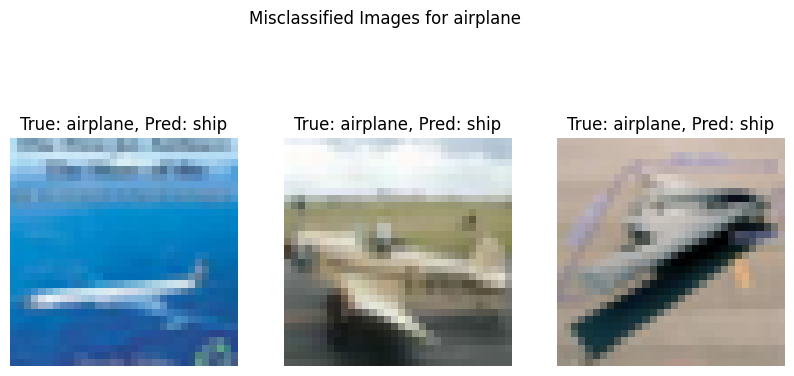

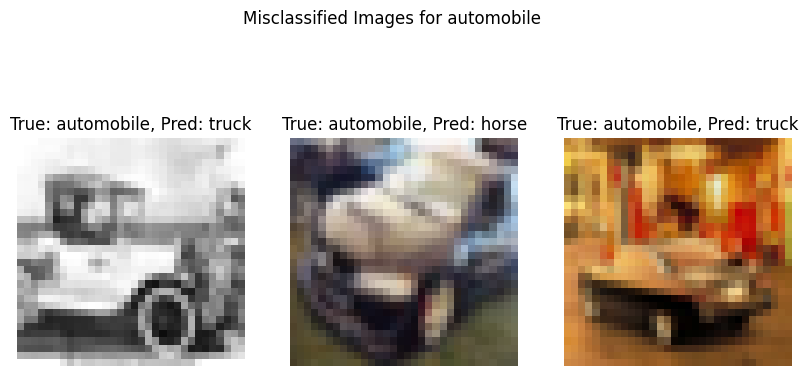

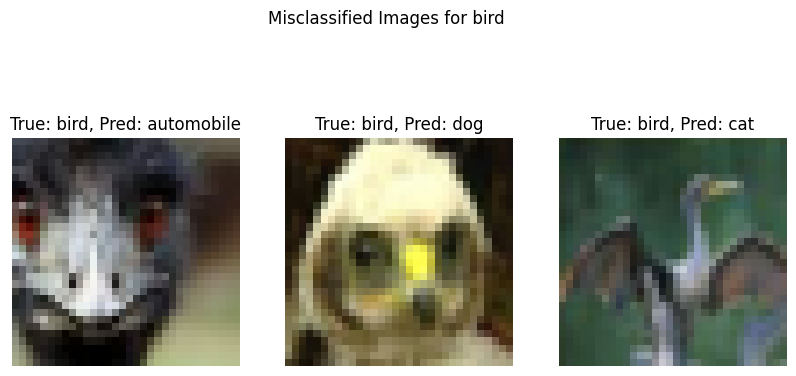

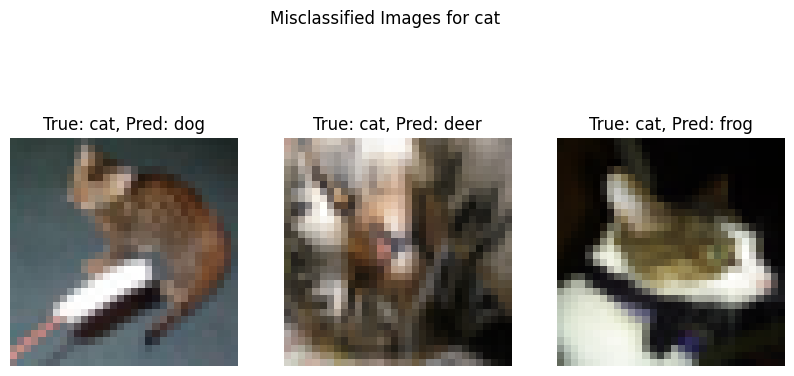

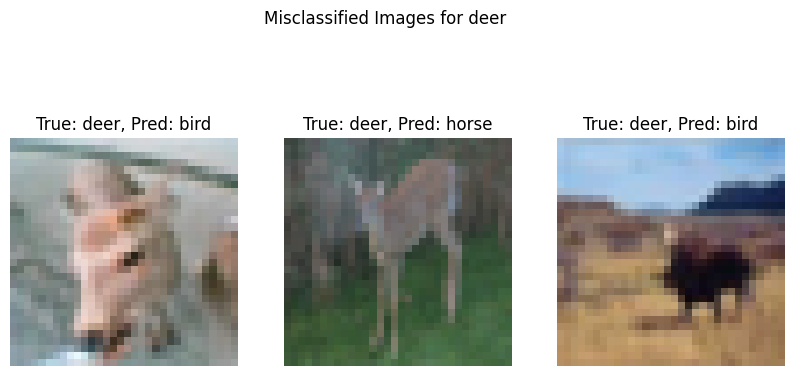

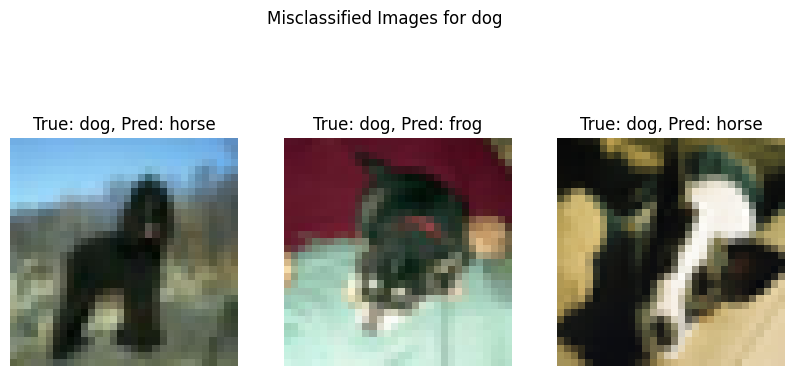

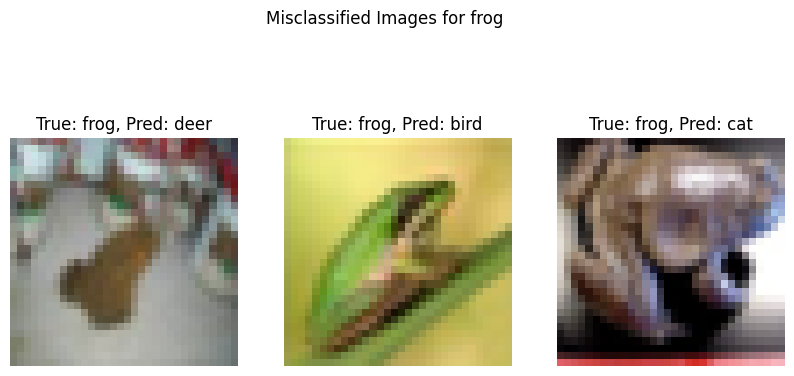

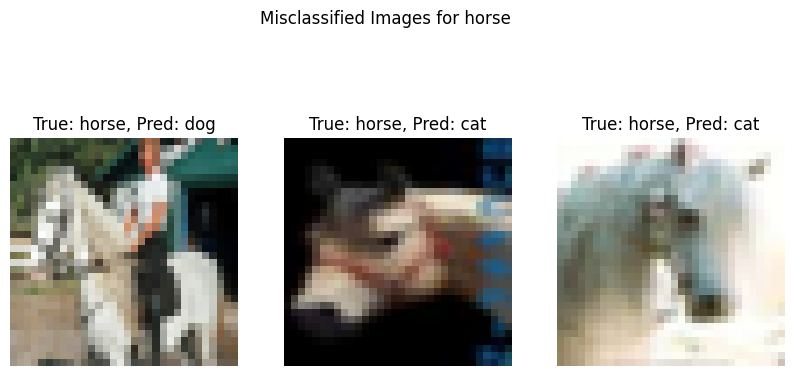

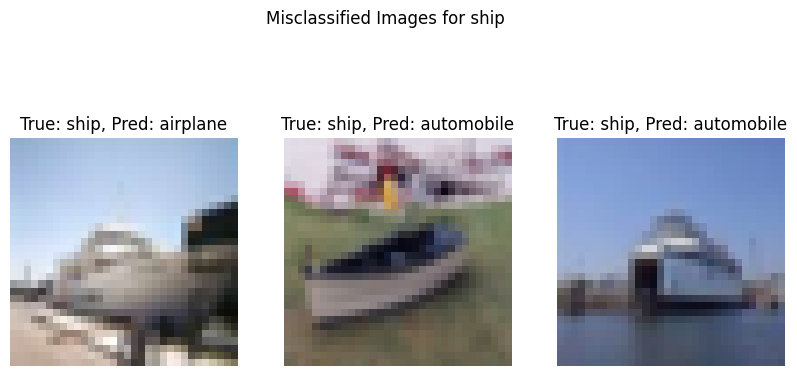

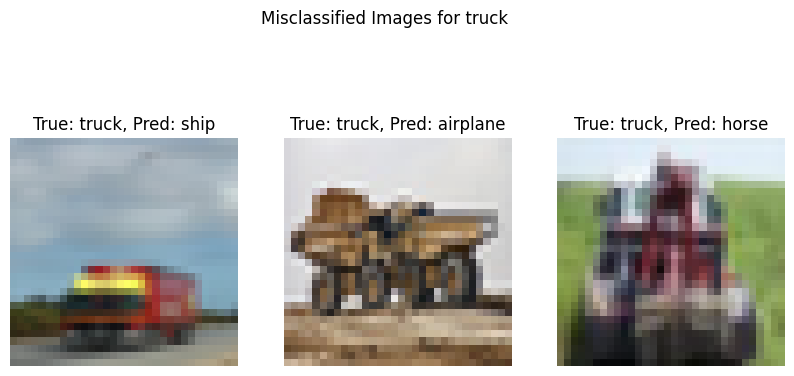

In [10]:
num_epochs = 200
loss_list = []
acc_list = []
train_acc_list = []

for epoch in range(num_epochs):
    net.train()
    correct_train = 0
    total_train = 0
    epoch_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_accuracy = 100. * correct_train / total_train
    train_acc_list.append(train_accuracy)
    print(f'Epoch {epoch+1}: Loss: {epoch_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%')
    loss_list.append(epoch_loss/len(train_loader))

    net.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    misclassified_images = {i: [] for i in range(10)}
    misclassified_labels = {i: [] for i in range(10)}
    misclassified_preds = {i: [] for i in range(10)}

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

            # 誤分類のデータを保存
            misclassified_idx = (predicted != labels).cpu().numpy()
            for idx in range(len(labels)):
                if misclassified_idx[idx] and len(misclassified_images[labels[idx].item()]) < 3:
                    misclassified_images[labels[idx].item()].append(inputs[idx].cpu())
                    misclassified_labels[labels[idx].item()].append(labels[idx].cpu().item())
                    misclassified_preds[labels[idx].item()].append(predicted[idx].cpu().item())

    test_accuracy = 100. * correct / total
    acc_list.append(test_accuracy)
    print(f'Test Accuracy: {test_accuracy:.2f}%')

    # 混同行列の出力
    cm = confusion_matrix(y_true, y_pred)
    print(f'Confusion Matrix (Epoch {epoch+1}):')
    print(cm)

    # 最後のエポックのみ各クラスの誤った予測の画像を表示
    if epoch + 1 == num_epochs:
        for class_idx in range(10):
            if len(misclassified_images[class_idx]) > 0:
                fig, axes = plt.subplots(1, len(misclassified_images[class_idx]), figsize=(10, 5))
                fig.suptitle(f'Misclassified Images for {classes[class_idx]}')
                if len(misclassified_images[class_idx]) == 1:
                    axes = [axes]
                for idx, ax in enumerate(axes):
                    image = misclassified_images[class_idx][idx].permute(1, 2, 0) * 0.5 + 0.5  # データの正規化を戻す
                    label = misclassified_labels[class_idx][idx]
                    pred = misclassified_preds[class_idx][idx]

                    ax.imshow(image)
                    ax.set_title(f'True: {classes[label]}, Pred: {classes[pred]}')
                    ax.axis('off')
                plt.show()

    torch.save(net.state_dict(), f'Weight_Epoch{epoch+1}.pth')
    scheduler.step()

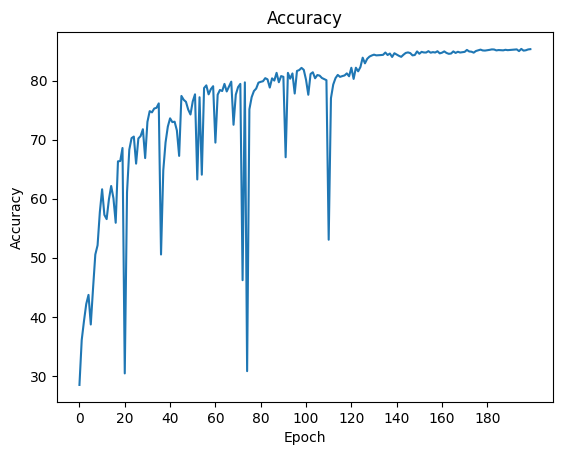

In [11]:
plt.plot(acc_list)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,200,20))
plt.ylabel('Accuracy')
plt.show()

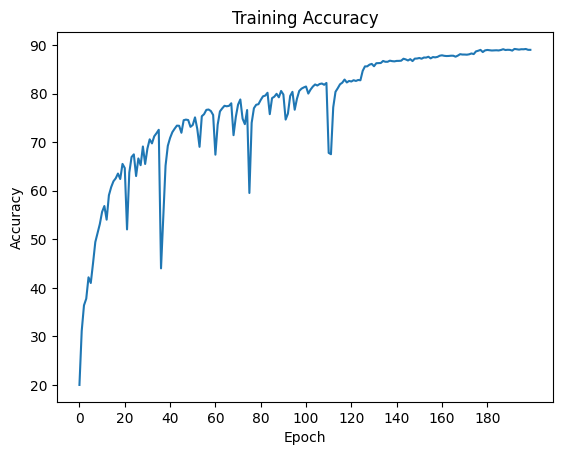

In [12]:
plt.plot(train_acc_list)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,200,20))
plt.ylabel('Accuracy')
plt.show()

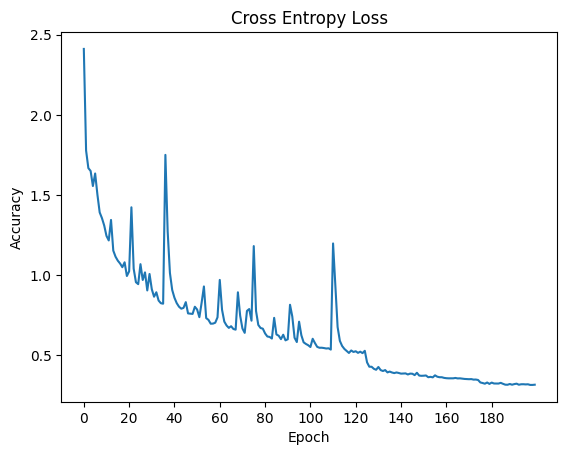

In [13]:
plt.plot(loss_list)
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,200,20))
plt.ylabel('Accuracy')
plt.show()